# <font color = 'red'> **Project: Stock Price Prediction**

## **Author: My Pham**

### **1. Introduction**

Stock prices have always been considered difficult to predict due to their sensitivity to the market. This project is created to provide predictions of stock prices for investors to make financial decisions. We will gather stock prices of 6 companies as a portfolio from 6 different industries (Amazon, Chase, Toyota, Walmart, Coca Cola and Microsoft) and S&P 500 index from 6/30/1999 to 7/1/2020, but will use Chase as an example for model predictions. 

This project will answer the following questions:
- What are the minimum prices and maximum prices of each company?
- What are the minimum volume and maximum volume of each company? 
- How are the companies in the portfolio doing in 2020?
- How will stock prices be predicted so that investors have adequate financial information to make investing decisions?

**Disclaimer**: This project is created for educational purposes and does not hold responsibility over the accuracy of source information and model results compared to reality for investing purposes.

**Result Summary**: 
- **Model results**: This project uses a combination of time series analysis, machine learning regression and deep learning models. Based on the model results, ARIMA time series provided the highest accuracy with a MSE of 0.22 (followed by KNN).
- **Visualization**: Tableau dashboards for the stock portfolio analysis were created here: https://tabsoft.co/2DxdiBV
- **Automated ML and Deployment**: the chosen model (time series) was applied in Azure ML and deployed into production here: https://bit.ly/3ksg24c

### **2. Business Understanding**

**Methodologies**: This project is a **regression** problem and can use a mix of the following models to compare which model provides the best results.
- **Data Cleaning, ETL, Database Management**: Stock prices will be extracted online and cleaned in **Python and MySQL**. We will perform **ETL** by saving them as csv files and creating a database for data of all companies in **MySQL Server**, then connecting Python to MySQL Server to extract the cleaned data as a table in this notebook.
- **ARIMA Time Series Forecasting**: To predict stock prices over a time series, **ARIMA** can be used as a **time series analysis** model using the stock prices as the predicted value and the time series as the index. 
- **Supervised Machine Learning Regression**: Since stock prices are numerical values, **supervised machine learning (ML) regression** models (KNN regression, linear regression, Ridge, Lasso, SVM both simple and with kernels (rbf, poly, linear)) can also be applicable to this project. 
- **Deep Learning**: We will also be using **deep (structured) learning (DL)** (part of machine learning) based on **artificial neural networks**. In particular, **Long Short-Term Memory (LSTM)**, which is a **recurrent neural network (RNN)**, will be used in this project by **keras**.
- **Web Scraping**: For real-time reference, the latest stock prices will be scraped from Yahoo Finance at the end of the project using **BeatifulSoup**.
- **Automated ML & Model Deployment**: The best model will be used to be reapplied in **Azure ML** to automate the modeling process with **R scripts** and deploy the model. 
- **Data Visualization**: All data will be loaded and visualized in **Tableau** to create dashboards as a report for businesses and investors' reference.

**Data Description**: Daily stock prices of all 6 companies above and the index from 6/30/2020 to 7/1/2020 will be extracted using Python (pandas data_reader) from Yahoo Finance for our analysis. Data extracted will include 6 attributes: Open price, Close price, Adj Close price, High price, Low price and Volume, all of which are numerical values. Close price will be used as the predicted variable. Each company will have 5,286 rows and 6 columns, making the entire table 37,002 rows and 6 columns. 

For this project, only Chase data will be used for all models with the main purpose of testing the models and comparing them to find the best model. Thus, the data for modeling will have 5,286 rows and 6 columns.

**Hypothesis**: The accuracy of prediction models is evaluated without the consideration of recent news and trends in the market, which can be analyzed to see their effects on the stock prices in a different type of project. This project will focus on regression models using the Date and Close price only.

**Platforms**: MS Excel, SQL, MySQL Server, Anaconda, Jupyter Lab, Jupyter Notebook, Google Colab, Python 3, R, Tableau, Azure ML Studio, Windows

**Packages**: pandas, numpy, matplotlib, seaborn, tensorflow, keras, beautifulsoup, requests, scikit-learn, statsmodels.tsa, mysql.connector

**Keywords**: Data cleaning, ETL (Extract-Transfrom-Load), Data Visualizaion, Time Series Analysis (ARIMA), Supervised Learning, Machine Learning, Regression, KNN, Linear Regression, Ridge, Lasso, SVM (Support Vector Machine), Deep Learning, Artificial Neural Networks (ANN, Long Shoft-Term Memory (LSTM), Recurrent Neural Network (RNN)), Automated ML, Web Scraping, Deployment

### **3. Data Acquisition**

#### **a. Data Extraction in Python**

Stock prices will be extracted from 6/30/1999 to 7/1/2020 from Yahoo Finance using Datareader including the following companies:
- ^GSPC: S&P500 (Index)
- AMZN: Amazon
- COKE: Coca Cola
- TM: Toyota
- MSFT: Microsoft
- WMT: Walmart
- JPM: JP Morgan Chase

In [216]:
# Import pandas for data manipulation and analysis
from pandas_datareader import data
import pandas as pd

In [217]:
# List of companies analyzed
companies = ['AMZN','COKE','JPM','MSFT','TM','WMT','^GSPC']

# Retrieve all data of the 7 companies on a daily basis over the last 20 years
beg = '1999-06-30'
end = '2020-07-01'

In [218]:
# Put data of each company in a data frame
amazon = data.DataReader('AMZN', 'yahoo', beg, end)
coke = data.DataReader('COKE', 'yahoo', beg, end)
chase = data.DataReader('JPM', 'yahoo', beg, end)
microsoft = data.DataReader('MSFT', 'yahoo', beg, end)
toyota = data.DataReader('TM', 'yahoo', beg, end)
walmart = data.DataReader('WMT', 'yahoo', beg, end)
sp500 = data.DataReader('^GSPC', 'yahoo', beg, end)

amazon['2020'].tail(5)    # take a look at Amazon's 2020 last stock prices
#coke.head(5)
#chase.head(5)
#microsoft.head(5)
#toyota.head(5)
#walmart.head(5)
#sp500.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-25,2756.229980,2712.139893,2739.550049,2754.580078,2968700.0,2754.580078
2020-06-26,2782.570068,2688.000000,2775.060059,2692.870117,6500800.0,2692.870117
2020-06-29,2696.800049,2630.080078,2690.010010,2680.379883,4223400.0,2680.379883
2020-06-30,2769.629883,2675.030029,2685.070068,2758.820068,3769700.0,2758.820068
2020-07-01,2895.000000,2754.000000,2757.989990,2878.699951,6363400.0,2878.699951


In [4]:
amazon.shape       # Get numbers of rows and columns for each data frame

(5286, 6)

Each data frame has 5,286 rows and 6 columns.

#### **b. ETL - Database in MySQL Server**

In [ ]:
# Convert them to csv files saved in local drive for MySQL
amazon.to_csv('amazon.csv')
coke.to_csv('coke.csv')
chase.to_csv('chase.csv')
microsoft.to_csv('microsoft.csv')
toyota.to_csv('toyota.csv')
walmart.to_csv('walmart.csv')
sp500.to_csv('sp500.csv')

For the purpose of practicing SQL, ETL and maintaining a database for queries and ad-hoc reports, these files are imported into MySQL Server, and data cleaning is performed in MySQL as follows:

- Create a new database for queries from all 7 tables which are concatenated using the same columns
- Drop Adj Close column as its values are almost exactly similar to Close values
- Add "Company" column indicating the company name for each row
- Rearrange columns to have Date and Company as the first two columns
- Handle missing or invalid data by replacing them with last available value (No missing data found)
- Run queries to perform general data analysis

All of these steps are also shown below in this Python project to compare results of data analysis with those in MySQL.

#### **c. Data Preprocessing**

In [219]:
# Combine all 7 tables into one dataframe
stock = pd.concat([amazon,coke,chase,microsoft,toyota,walmart,sp500], keys=['amazon','coke','chase','microsoft','toyota','walmart','sp500'])
stock.head(5)

High     Low     Open     Close      Volume  Adj Close
       Date                                                                  
amazon 1999-06-30  64.62500  57.500  58.2500  62.56250  16906200.0   62.56250
       1999-07-01  63.25000  59.000  62.6250  61.18750  14382800.0   61.18750
       1999-07-02  63.00000  60.375  61.6250  62.03125   7208400.0   62.03125
       1999-07-06  66.65625  62.750  64.0000  63.43750  14886200.0   63.43750
       1999-07-07  63.75000  60.000  63.0625  60.93750   9988000.0   60.93750

In [6]:
print("The size of the dataset is: ", stock.shape)    # Get numbers of rows and columns for combined data frame

The size of the dataset is:  (37002, 6)


In [ ]:
stock.info()                 # Get general information of data in each column

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 37002 entries, ('amazon', Timestamp('1999-06-30 00:00:00')) to ('sp500', Timestamp('2020-07-01 00:00:00'))
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       37002 non-null  float64
 1   Low        37002 non-null  float64
 2   Open       37002 non-null  float64
 3   Close      37002 non-null  float64
 4   Volume     37002 non-null  float64
 5   Adj Close  37002 non-null  float64
dtypes: float64(6)
memory usage: 1.8+ MB


Since adjusted close prices are almost exactly the same as close prices (differences are extremely low), only the other 5 attributes will be used for this project. The data frame now is sorted by company name. It will be rearranged to be sorted by date for better readability. All data will also be rounded to 4 decimals except for Volume, which will be converted to an integer type to show as whole numbers.

In [220]:
df = stock.swaplevel(0,1).sort_index(0)                # Swap indices of data frame
df = df.drop(['Adj Close'], axis=1)                    # Drop "Adj Close" column
df = df.round({'High':4,'Low':4,'Open':4,'Close':4})   # Round data of the first 4 columns to 4 decimals
df['Volume'] = df['Volume'].astype(int)                # Convert "Volume" data from float to integer
df.head(10)

High        Low       Open      Close      Volume
Date                                                                        
1999-06-30 amazon       64.6250    57.5000    58.2500    62.5625    16906200
           chase        57.7500    54.7917    55.4167    57.6667     7451200
           coke         56.7500    56.0000    56.7500    56.0000       23500
           microsoft    45.1250    43.3750    43.8750    45.0938    57610200
           sp500      1372.9301  1338.7800  1351.4500  1372.7100  1117000000
           toyota       64.0000    63.2500    63.2500    64.0000       23200
           walmart      48.5000    45.3750    46.5625    48.2500     8998000
1999-07-01 amazon       63.2500    59.0000    62.6250    61.1875    14382800
           chase        57.7500    55.9583    57.0417    57.2917     6681900
           coke         56.7500    56.0000    56.2500    56.0000        6000

### **4. Exploratory Data Analysis**

#### **a. Data Cleaning**

In [ ]:
df.shape        # Check numbers of columns and names of new data frame

(37002, 5)

The new data frame has 37,002 rows and 5 columns.

In [ ]:
print("Column names are: ", df.keys())     # Get list of column names

Column names are:  Index(['High', 'Low', 'Open', 'Close', 'Volume'], dtype='object')


All columns are necessary and provide useful information. There's no need to remove any other unnecessary column.

In [ ]:
df.dtypes             # Check data types of the columns

High      float64
Low       float64
Open      float64
Close     float64
Volume      int64
dtype: object

All data are numerical values, which are the correct data types for the models of this project.

In [ ]:
# Check for missing data in each column
print("Total missing values in each column are: ")
print(df.isnull().sum())

# Check for missing data in each row
count = 0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Number of rows with missing data is: ', count)
print('Percentage of rows with missing data compared to the entire dataset is: ',round((count/len(df.index))*100))

Total missing values in each column are: 
High      0
Low       0
Open      0
Close     0
Volume    0
dtype: int64
Number of rows with missing data is:  0
Percentage of rows with missing data compared to the entire dataset is:  0


There is no missing value found in the data frame.

In [ ]:
df.describe().round(2)  # Summary of data rounded to 2 decimals

,High,Low,Open,Close,Volume
count,37002.00,37002.00,37002.00,37002.00,3.700200e+04
mean,338.45,333.34,335.99,336.02,4.552458e+08
std,623.16,615.58,619.54,619.62,1.225037e+09
min,6.10,5.51,5.91,5.97,0.000000e+00
25%,46.82,45.56,46.21,46.19,4.797750e+05
50%,67.85,66.46,67.19,67.17,8.798850e+06
75%,140.38,138.57,139.51,139.43,4.152510e+07
max,3393.52,3378.83,3380.45,3386.15,1.145623e+10


The values of the first 4 columns are relatively in the same range. Since Volume has a different range, all data will be scaled later in the Feature Engineering step. Data Visualization section will provide more visualized details of these data.

A "stock" database with the "allstock" table for all cleaned data was created in MySQL Server. Python 3 will connect to MySQL Server using mysql.connector to pull data and compare them with the newly created dataframe "df" above.

In [7]:
# Connect to database in MySQL server and pull data to compare with cleaned data from database in MySQL
#!pip install mysql-connector
import mysql.connector         # Import library to connect Python to MySQL
db = mysql.connector.connect(user='root', password='***************', host='127.0.0.1', database='stock')

In [ ]:
# Import PrettyTable to prettify results gathered
from prettytable import PrettyTable     

# Get data of the first 10 rows into a table 
cursor = db.cursor()
data = "select * from allstock limit 10"
cursor.execute(data)
result = cursor.fetchall()
t = PrettyTable(['dates', 'company', 'high_price', 'low_price', 'open_price', 'close_price', 'volume'])
for dates, company, high_price, low_price, open_price, close_price, volume in result:
      t.add_row([dates, company, high_price, low_price, open_price, close_price, volume])
print(t)

# Close MySQL database
db.close()

+------------+-----------+------------+-----------+------------+-------------+------------+
|   dates    |  company  | high_price | low_price | open_price | close_price |   volume   |
+------------+-----------+------------+-----------+------------+-------------+------------+
| 1999-06-30 |   Amazon  |  64.6250   |  57.5000  |  58.2500   |   62.5625   |  16906200  |
| 1999-06-30 |   Chase   |  57.7500   |  54.7917  |  55.4167   |   57.6667   |  7451200   |
| 1999-06-30 | Coca Cola |  56.7500   |  56.0000  |  56.7500   |   56.0000   |   23500    |
| 1999-06-30 | Microsoft |  45.1250   |  43.3750  |  43.8750   |   45.0938   |  57610200  |
| 1999-06-30 |   S&P500  | 1372.9301  | 1338.7800 | 1351.4500  |  1372.7100  | 1117000000 |
| 1999-06-30 |   Toyota  |  64.0000   |  63.2500  |  63.2500   |   64.0000   |   23200    |
| 1999-06-30 |  Walmart  |  48.5000   |  45.3750  |  46.5625   |   48.2500   |  8998000   |
| 1999-07-01 |   Amazon  |  63.2500   |  59.0000  |  62.6250   |   61.1875   |  

The "allstock" table create in MySQL is exactly the same as the "df" dataframe created in Python. There was no missing step in the data preparation process as the two results are similar. The data from the "df" data frame is ready to be used for model prediction.

#### **c. Data Visualization**

In [221]:
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.mlab as mlab
%matplotlib inline

In [ ]:
# Correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(6)

,High,Low,Open,Close,Volume
High,1.000000,0.999927,0.999965,0.999958,0.775359
Low,0.999927,1.000000,0.999952,0.999959,0.774742
Open,0.999965,0.999952,1.000000,0.999923,0.775180
Close,0.999958,0.999959,0.999923,1.000000,0.775014
Volume,0.775359,0.774742,0.775180,0.775014,1.000000


From the correlation matrix, all the attributes are highly positively correlated to each other. While Volume has the lowest correlation coefficients with other attributes, the coefficients are still high. Close price has the strongest correlation with Low price and the weakest correlation with Volume and Open price. Low price also has the weakest correlation with Volume and High price. Despite these, all of the coefficients are significantly high as expected. Therefore, we will only use 'Date' and 'Close' columns for our prediction models.

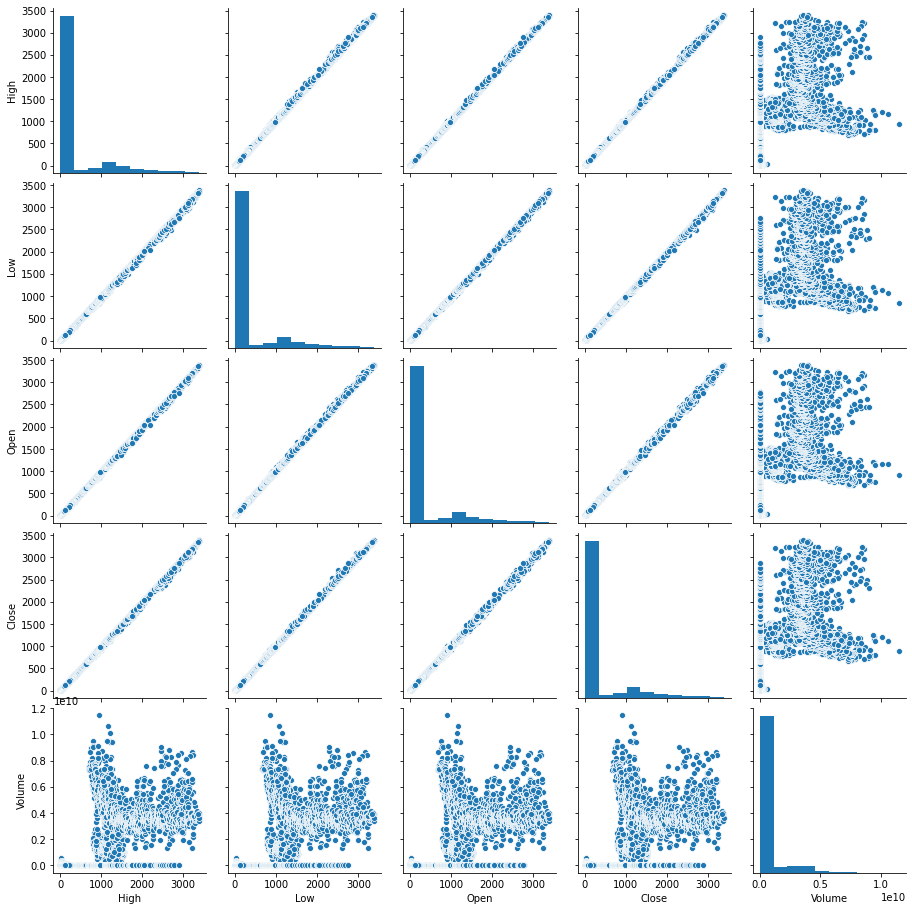

In [ ]:
# Scatterplots to visualize correlation matrix
sns.pairplot(df, palette=['green','orange','brown','dodgerblue','red'])

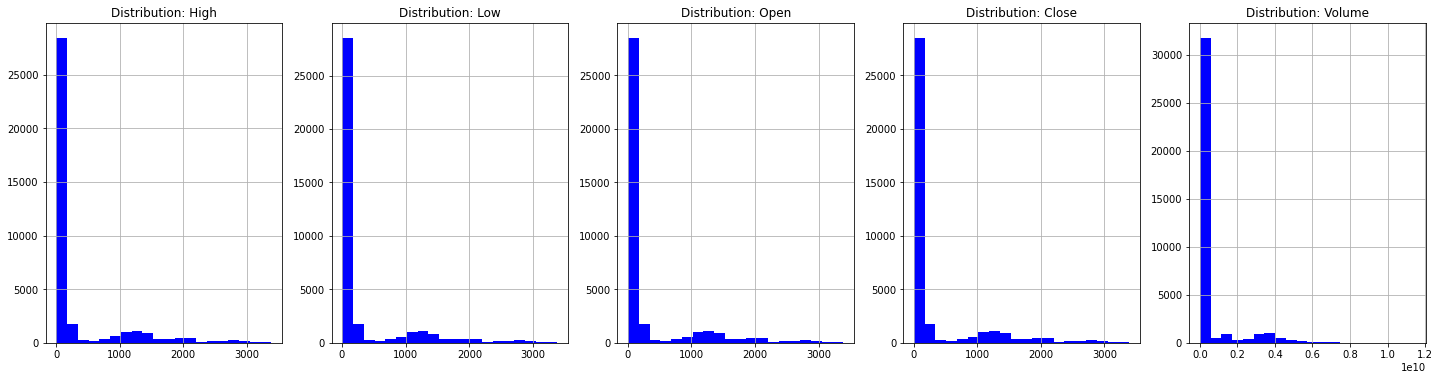

In [ ]:
# Get list of all features
features = df.columns.tolist()

# Histograms for features
def plot_hists(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20,ax=ax,facecolor='blue')
        ax.set_title('Distribution: '+ feature) 
    fig.tight_layout() 
    plt.show()

plot_hists(df,df.columns,4,5)

Data of all columns are highly positively skewed as expected. From the market standpoint, prices increase over time by nature due to inflation, leading to the majority of prices (mode) are higher than the rest (past prices).

#### **d. Data Selection**

For this project, a mix of models will be used to predict stock prices. For a faster process, Chase's data instead of all companies' data will be used for all models.

In [222]:
# Get Chase data and drop 'Adj Close' column for less confusion
jpm = chase.drop('Adj Close',1)
jpm.head(5)

,High,Low,Open,Close,Volume
Date,,,,,
1999-06-30,57.750000,54.791668,55.416668,57.666668,7451200.0
1999-07-01,57.750000,55.958332,57.041668,57.291668,6681900.0
1999-07-02,57.541668,56.666668,56.750000,56.708332,2399100.0
1999-07-06,57.916668,56.250000,56.875000,57.375000,2863800.0
1999-07-07,57.583332,56.416668,57.125000,56.416668,4667400.0


In [223]:
# Get a data frame for 'Close' column only, which will mainly be used for time series analysis
dataframe = jpm.drop(['High','Low','Open','Volume'],1)
dataframe.head(3)

,Close
Date,
1999-06-30,57.666668
1999-07-01,57.291668
1999-07-02,56.708332


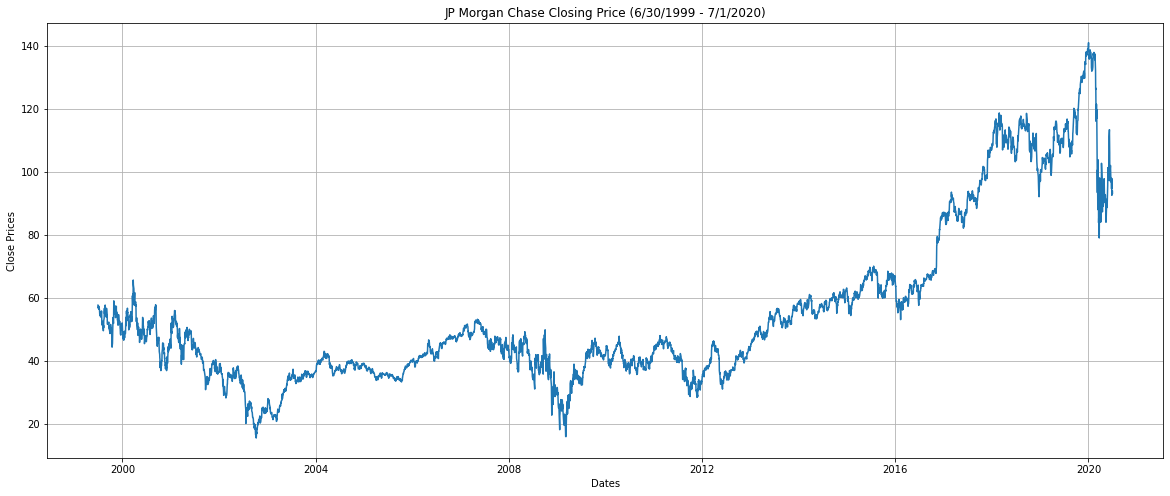

In [ ]:
# Visualize close prices of Chase over the time series
plt.figure(figsize=(20,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(dataframe)
plt.title('JP Morgan Chase Closing Price (6/30/1999 - 7/1/2020)')
plt.show()

Close prices of Chase increase over time with its highest peak in 2020 right before a sharp drop in the first half of 2020. This is an expected observation due to Covid-19, similar to a sharp decrease in 2009 due to economic recession. 

A scatter plot for the close prices for similar results is shown below:

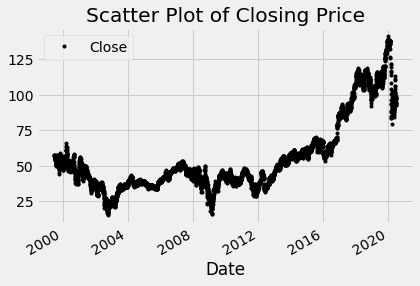

In [429]:
# Scatterplot for close prices
dataframe.plot(style='k.')
plt.title('Scatter Plot of Closing Price')
plt.show()

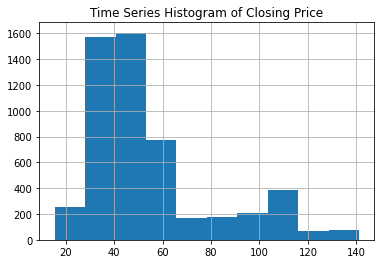

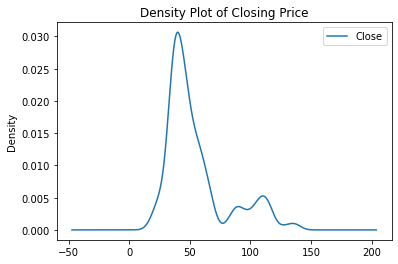

In [ ]:
# Distribution histogram and density plot to show distribution of close prices for Chase
dataframe.hist()               # histogram
plt.title('Time Series Histogram of Closing Price')

dataframe.plot(kind='kde')     # density plot
plt.title('Density Plot of Closing Price')
plt.show()

The density plot is a near-normal distribution (bell-curved) over close prices of Chase. The graph is positively skewed (right-skewed) as its tail is longer on the right, indicating that the majority of prices are lower than the rest, and the median is lower than the average price.

### **5. Prediction Models**

#### **Method 1: Time Series Analysis**

Since values in general increase over time, time series (TS) analysis will be applicable to this project with one column of close price and a time series index. This project is using only previous values of the time series to predict future values, we'll use **Univariate Time Series Forecasting** (while **Multie Variate Time Series Forecasting** is for predictors other than the series).

Time series analysis is not appropriate for values that are constant or are in the form of a function. As time series analysis has a very particular behavior, there is a high probability that it will follow the same patterns in the future. Thus, most TS models work with the assumption that data are stationary:
- Constant **mean**
- Constant **variance** 
- **Autocovariance** that does not depend on time

A time series has 3 systematic components (level, trend, seasonality) and a non-systematic component (noise):
- **Level**: The average value in the series.
- **Trend**: The increasing or decreasing value in the series.
- **Seasonality**: The repeating short-term cycle in the series.
- **Noise**: The random variation in the series.

Statistical forecasting techniques can only be implemented when time series is stationary. We will check for stationarity first.


#### **a. Check for Stationarity**

There are two ways to test for stationarity:
- **Rolling Statistics** (visualization technique): plot **moving mean** or **moving average** to see if they vary with time (at any given instance t, take the average/variance of the last 12 months)
- **ADCF Test (Augmented Dickey-Fuller Test)** (statistical test): Null hypothesis that time series is non-stationary and check for test results of **a test statistic** and **critical values** for difference confidence levels:

H0: TS is non-stationary (TS has a unit root (value of a = 1).

H1: TS is stationary (TS has no unit root).

If T-stat > critical values --> fail to reject the Null hypothesis, TS is non-stationary.

In [185]:
# Import libraries for ADCF test
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm

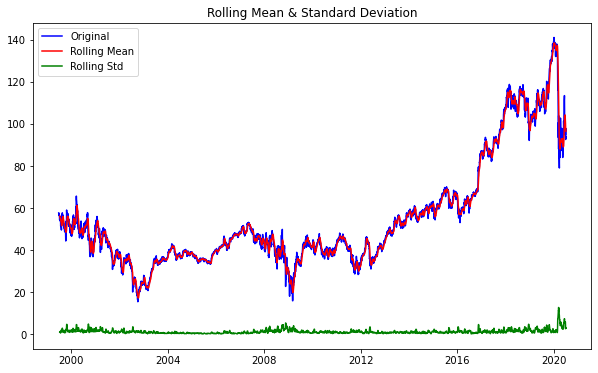

<Figure size 1152x576 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -1.009605
p-value                           0.749745
#Lags Used                       32.000000
Number of Observations Used    5253.000000
Critical Value (1%)              -3.431595
Critical Value (5%)              -2.862090
Critical Value (10%)             -2.567063
dtype: float64


In [186]:
# Test for stationarity
def test_stationarity(timeseries):
    
    # Rolling statistics
    rollmean = timeseries.rolling(12).mean()
    rollstd = timeseries.rolling(12).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rollmean, color='red', label='Rolling Mean')
    std = plt.plot(rollstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.figure(figsize=(16,8))
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(dataframe['Close'])

Although standard deviation is small, mean of stock prices is obviously increasing over time. According to ACDF test results, p-value is greather than 0.05, and test statistic is greater than critical values. Therefore, we fail to reject the Null hypothesis, meaning time series is non-stationary.

#### **b. Stationarize Time Series**

Based on the above graph, it's clear that there are two main factors making the times series non-stationary: **trend** (the average of stock prices is increasing over time) and **seasonality** (variations at specific time frames). Thus, differncing by removing trend and seasonality from the time series will make the time series become stationary.

**- Remove Trend**

Since values appear to have a positive trend, we will tak a **log transformation** for values to penalize higher values more than lower values, which will reduce the magnitude of values and the rising trend of the series. 

In [10]:
import numpy as np              # mathematical functions on large, multi-dimensional arrays and matrices

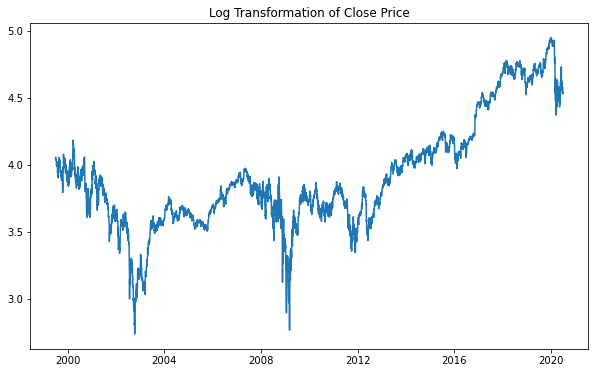

In [187]:
# Log transformation of close prices
log_df = np.log(dataframe)      # log transformation
plt.title('Log Transformation of Close Price')
plt.plot(log_df)                # visualize transformed data

As values seem to have an upward trend, the **smoothing** approach **(moving average)** will be appropriate by taking the rolling average of the past 12 months' data.

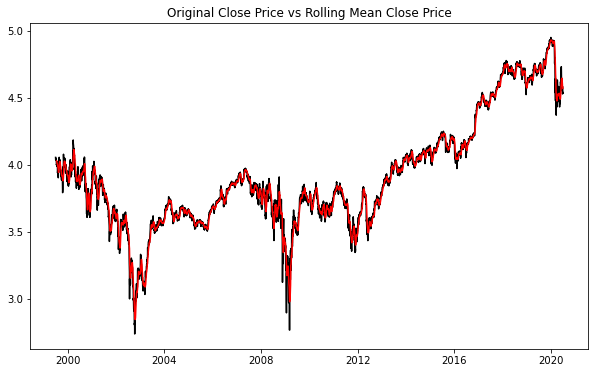

In [188]:
# Moving average
ma = log_df.rolling(12).mean()
plt.title('Original Close Price vs Rolling Mean Close Price')
plt.plot(log_df, color='black', label='Original')
plt.plot(ma, color='red', label='Rolling Mean')

Variance = Log Transformed - Moving Average

To smooth the data, rolling mean will be substracted from the transformed original data.

In [189]:
diff = log_df - ma
diff.head(12)

,Close
Date,
1999-06-30,NaN
1999-07-01,NaN
1999-07-02,NaN
1999-07-06,NaN
1999-07-07,NaN
1999-07-08,NaN
1999-07-09,NaN
1999-07-12,NaN
1999-07-13,NaN


Since moving average is taking data of the past 12 months, the first 11 values are not defined and will be dropped before stationarity is rechecked.

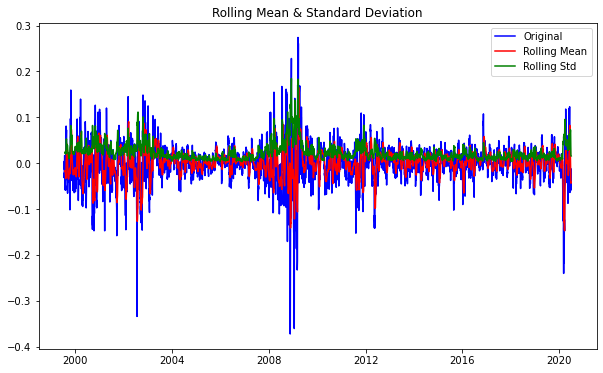

<Figure size 1152x576 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                -1.260013e+01
p-value                        1.743564e-23
#Lags Used                     3.300000e+01
Number of Observations Used    5.241000e+03
Critical Value (1%)           -3.431598e+00
Critical Value (5%)           -2.862092e+00
Critical Value (10%)          -2.567064e+00
dtype: float64


In [190]:
diff.dropna(inplace=True)          # drop first 11 NaN values
test_stationarity(diff['Close'])   # recheck for stationarity

The ADCF test results have now improved. The p-value is smaller than 0.05. The test statistic is smaller than the critical value (5%). Thus, We can reject the Null hypothesis, meaning we can have 95% confidence that the time series is now stationary.

With this method, it is required that time periods are clearly defined. For a complex analysis of stock prediction, **exponential weighted moving average** is a popular method that assigns higher weights to more recent values (weights assigned to past values with a decay factor):

x_t+1 = EMA_t = γ × EMA_t-1 + (1-γ) x_t where EMA_0 = 0 and EMA is the exponential moving average value over time.

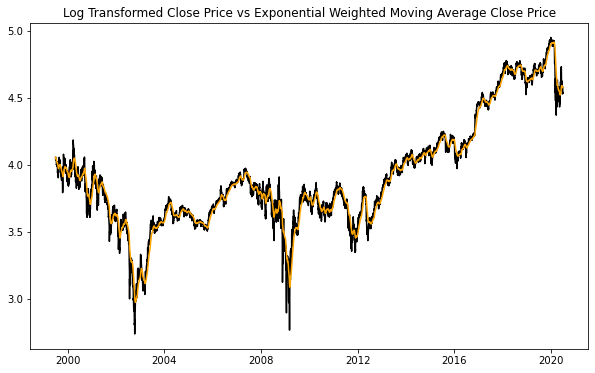

In [191]:
ema = log_df.ewm(halflife=12).mean()
plt.title('Log Transformed Close Price vs Exponential Weighted Moving Average Close Price')
plt.plot(log_df, color='black')
plt.plot(ema, color='orange')

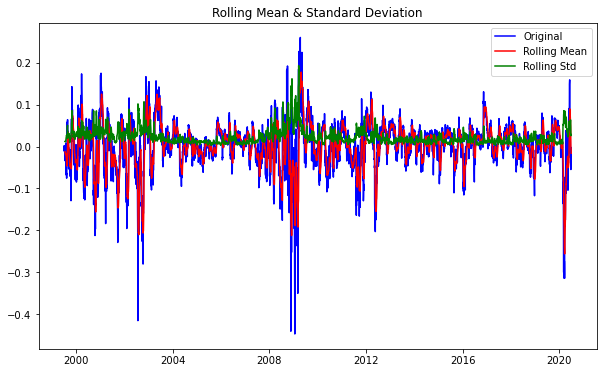

<Figure size 1152x576 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                -1.038019e+01
p-value                        2.149045e-18
#Lags Used                     3.300000e+01
Number of Observations Used    5.252000e+03
Critical Value (1%)           -3.431596e+00
Critical Value (5%)           -2.862090e+00
Critical Value (10%)          -2.567063e+00
dtype: float64


In [192]:
# Similary, take the difference and retest for stationarity
ema_diff = log_df - ema
test_stationarity(ema_diff['Close'])

In this case, the test results didn't change much. Time series is still stationary.

**- Remove Trend and Seasonality**

While the techniques to reduce trend may not work in all cases, there are two ways to remove trend and seasonality:
- **Differencing**: taking the difference of a specific time lag
- **Decomposition**: modeling both trend and seasonality and removing them from the model

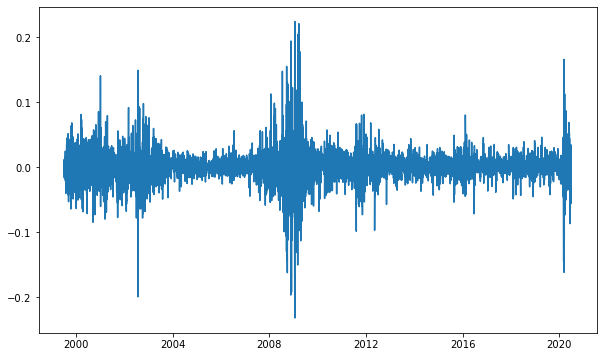

In [193]:
# First order differencing using pandas (take the difference of an observation at a specific instance with that at the previous instance)
log_df_shift = log_df - log_df.shift()
plt.plot(log_df_shift)

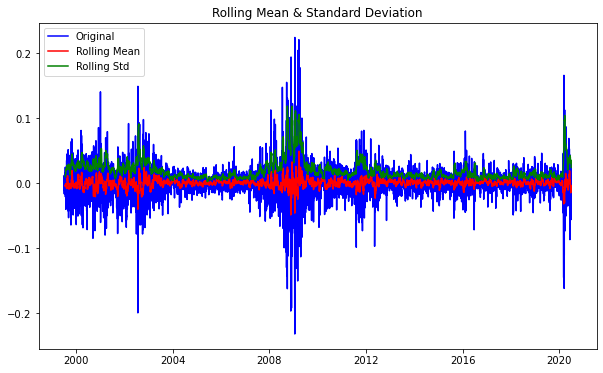

<Figure size 1152x576 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                -1.282491e+01
p-value                        6.042695e-24
#Lags Used                     3.300000e+01
Number of Observations Used    5.251000e+03
Critical Value (1%)           -3.431596e+00
Critical Value (5%)           -2.862091e+00
Critical Value (10%)          -2.567063e+00
dtype: float64


In [194]:
# Verify the reduced trend by dropping NaN values and retesting for stationarity
log_df_shift.dropna(inplace=True)
test_stationarity(log_df_shift['Close'])

From the result table, p-value is significanly lower than it was previously, and test statistic is now smaller than critical value (1%). We now have 99% confidence that the time series is stationary.

<ipython-input-195-a038d6e7a5c1>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decom = seasonal_decompose(log_df, model='multiplicative', freq = 30)


<Figure size 720x432 with 0 Axes>

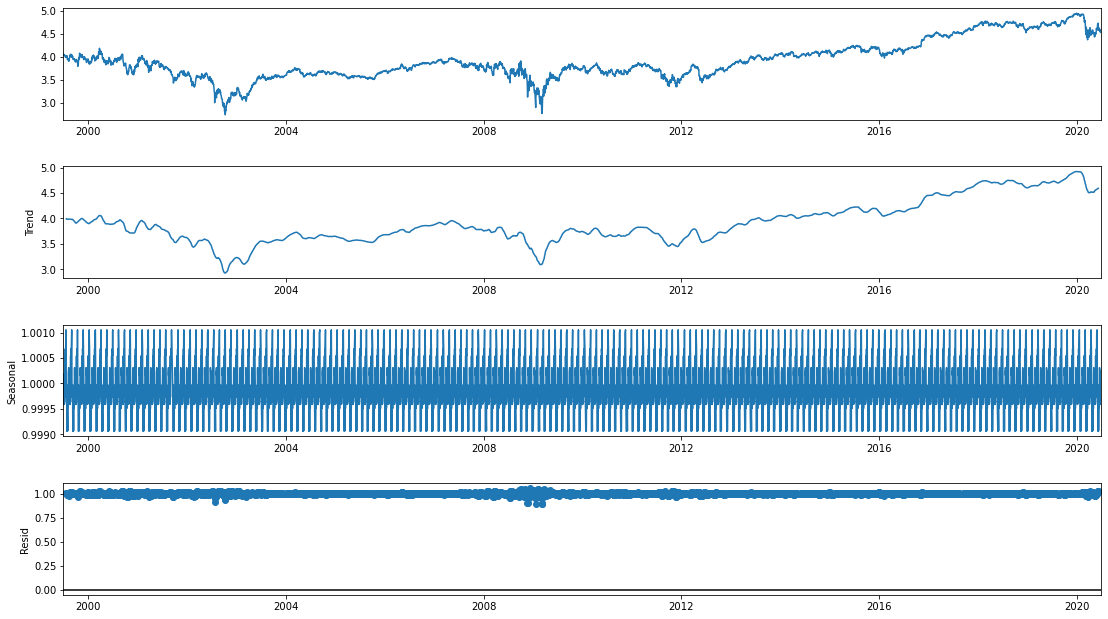

In [195]:
# Decomposition (modeling both trend and seasonality separately)
from statsmodels.tsa.seasonal import seasonal_decompose

decom = seasonal_decompose(log_df, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = decom.plot()  
fig.set_size_inches(16, 9)

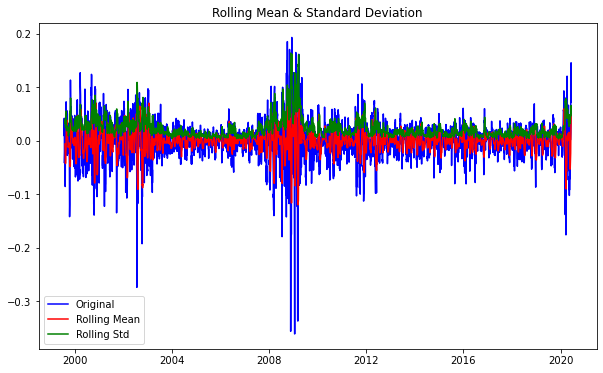

<Figure size 1152x576 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                -1.872223e+01
p-value                        2.032450e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.222000e+03
Critical Value (1%)           -3.431603e+00
Critical Value (5%)           -2.862094e+00
Critical Value (10%)          -2.567065e+00
dtype: float64


In [196]:
# Check for stationarity of residuals
residual = seasonal_decompose(log_df, period=30).resid
residual.dropna(inplace=True)
test_stationarity(residual)

In this result table with even better results, the p-value is significantly lower than 0.05, and the test statistic is lower than the critical value (1%). The time series is very close to stationary. We can have 99% confidence that it is stationary. The time series can now be forecasted.

#### **c. Forecasting Time Series Model Training**

With the estimation of trend and seasonality, there are two possibilities:
- A **strictly stationary series** with no dependence among values: easy but rare case - model the residuals as white noise.
- A series with significant **dependence among values**: use ARIMA to forecast the series.

**ARIMA Model**: **AR** (Autoregressive) + **IMA** (Integrated Moving Average)
- **AR**: Y(t) = a + b1Y(t-1) + b2Y(t-2) + ,,, + bpY(t-p) + e1 (a function of lags of Yt)
- **MA**: Y(t) = a + E1 + f1E(t-1) + f2E(t-2) + ... + fqE(t-q) (a function of lagged forecast errors)
- **ARIMA**: Y(t) = a + b1Y(t-1) + b2Y(t-2) + ,,, + bpY(t-p)Et + f1E(t-1) _ f2E(t-2) + .. + fqE(t-q) (predicted Yt = constant + linear combination lags of Y (upto p lags) + linear combination of lagged forecast errors (upto q lags))

ARIMA(p,d,q): a linear equation to forecast time series depending on 3 parameters (p,d,q) for smoothing, stationarity and forecasting:
- **p (number of AR terms)**: number of autoregressive terms for smoothing - lags of dependent variable (eg. p=4, preditors for x(t) are x(t-1)...x(t-4)
- **d (number of differences)**: number of nonseasonal differences for stationarity (order of differencing) (eg. first order difference)
- **q (number of MA terms)**: number of lagged forecast errors in the prediction equation (eg. q=4, predictors for x(t) are e(t-1)...e(t-4) where e(i): difference between MA at ith instance and actual value)

There are two ways to determine p and d:
- **Autocorrelation Function (ACF)**: measures the correlation between a TS and a lag version of itself (eg. at lag 4: check the correlations between TS at t1...t2 and t1-5...t2-5)
- **Partial Autocorrelation Function (PACF)**: similar to ACF but after eliminating the variations already explained by the intervening comparisons (eg. at lag 4: check the correlation but remove the effects already explained by lags 1 tp 3)

In this case, Auto ARIMA will be used to determine p, d, q for the model to save time without the need to plot both ACF and PACF graphs. Here we will plot these two graphs for visualization and compare with Auto ARIMA results. First, we will split data into training set and testing set, visualize it, then create an ARIMA model and train it with the close price on the training set.

In [430]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(log_df, nlags=20)
lag_pacf = pacf(log_df, nlags=20, method='ols')

C:\Users\My Pham\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

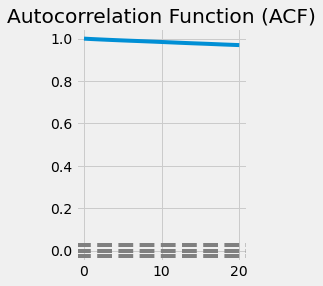

In [443]:
# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function (ACF)')

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

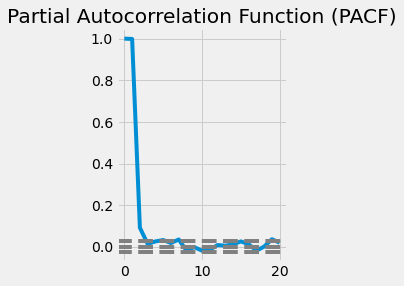

In [444]:
# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function (PACF)')
#plt.tight_layout()

In these plots, the dot lines on either side of 0 are confidence intervals, used to determine p and q.
- **p**: the lag value in the PACF chart that crosses the upper confidence interval for the first time 
- **q**: the lag value in the ACF chart that crosses the upper confidence interval for the first time 

Let's use Auto ARIMA to faster this process.

In [435]:
# Split data into train set and test set
train_set, test_set = log_df[3:int(len(log_df)*0.8)], log_df[int(len(log_df)*0.8):]
print('Numbers of rows and columns of train set are: ', train_set.shape)
print('Numbers of rows and columns of test set are: ', test_set.shape)

Numbers of rows and columns of train set are:  (4225, 1)
Numbers of rows and columns of test set are:  (1058, 1)


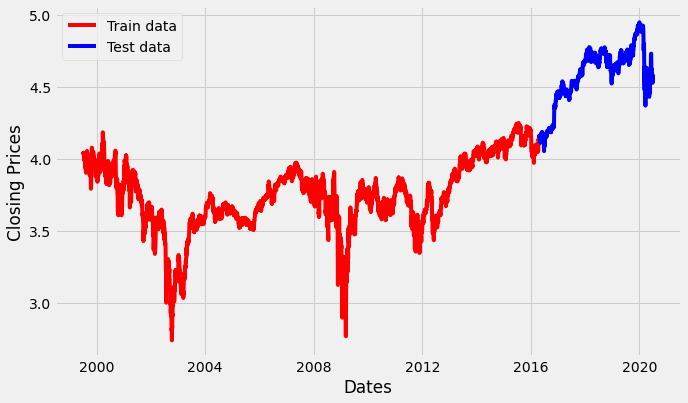

In [436]:
# Visualize train set and test set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_set, 'red', label='Train data')
plt.plot(test_set, 'blue', label='Test data')
plt.legend()

**- Auto ARIMA Model on Data**

In [200]:
# Import ARIMA libraries
from statsmodels.tsa.arima_model import ARIMA   
#!pip install pmdarima
from pmdarima.arima import auto_arima

In [437]:
# Determine p, d, q using Auto ARIMA
automodel = auto_arima(train_set, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # no seasonality
                      start_P=0, D=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(automodel.summary()) 

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-18829.824, BIC=-18817.127, Time=1.056 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-18854.913, BIC=-18835.867, Time=0.557 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-18856.697, BIC=-18837.651, Time=0.910 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-18831.820, BIC=-18825.472, Time=0.322 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-18862.426, BIC=-18837.032, Time=0.608 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=-18863.258, BIC=-18831.515, Time=2.274 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=-18857.270, BIC=-18831.876, Time=0.770 seconds
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=-18856.981, BIC=-18818.890, Time=2.802 seconds
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=-18862.462, BIC=-18824.371, Time=2.209 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=-18860.968, BIC=-18829.225, Time=2.119 seco

According to the ARIMA model results, the lowest AIC will provide the set of p, d, q for the best goodness-of-fit. The lowest AIC is -18,863 for ARIMA(2,1,1). Let's look at the residual plots before implementing the ARIMA model with the optiaml parameters of p, d, q.

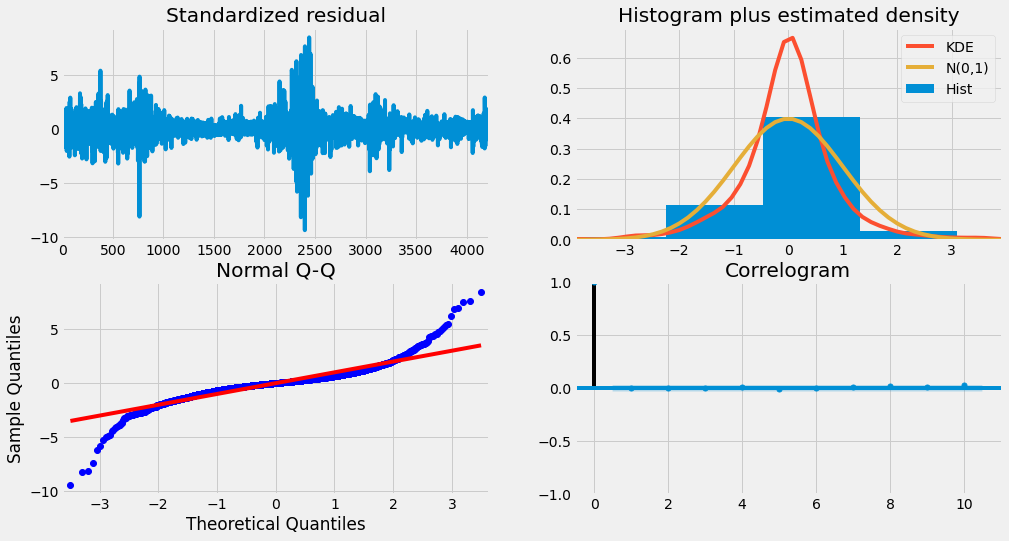

In [445]:
# Residual plots
automodel.plot_diagnostics(figsize=(15,8))
plt.show()

The first plot of standardized residual show the residual errors fluctuate around a mean of 0 and a uniform variance.

The second plot show the density that has a normal distribution with a mean of 0.

The third plot of Normal Q-Q show that all the values should lie on the red line, any significant deviations from the red line mean that the distribution is skewed.

The fourth plot of correlogram (ACF plot) show the residuals are not autocorrelated (any autocorrelation would imply the pattern in the residual errors not explained in the model, thus requiring more predictors for the model).

Now, the ARIMA model with the optimal parameters of p, d, q can be created.

In [446]:
# ARIMA model summary with optimal parameters
arima_model = ARIMA(train_set, order=(2,1,1))  
arima_fitted = arima_model.fit(disp=-1)  
print(arima_fitted.summary())

C:\Users\My Pham\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\My Pham\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4224
Model:                 ARIMA(2, 1, 1)   Log Likelihood                9437.317
Method:                       css-mle   S.D. of innovations              0.026
Date:                Mon, 03 Aug 2020   AIC                         -18864.635
Time:                        21:18:26   BIC                         -18832.892
Sample:                             1   HQIC                        -18853.414
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.271e-05      0.000      0.073      0.942      -0.001       0.001
ar.L1.D.Close     0.7234      0.119      6.094      0.000       0.491       0.956
ar.L2.D.Close     0.0308      0.024     

The fitted model has the low AIC of -18,864, which is a good result. The model can be used to forecast stock prices as below:

**- Forecast Stock Price on Test Data**

In [450]:
## Forecast stock prices on test data with 95% confidence 
fc, se, conf = arima_fitted.forecast(1058, alpha=0.5)       # forecast with 95% confidence
fc_series = pd.Series(fc, index=test_set.index)             # store as pandas series
lower_series = pd.Series(conf[:, 0], index=test_set.index)
upper_series = pd.Series(conf[:, 1], index=test_set.index)

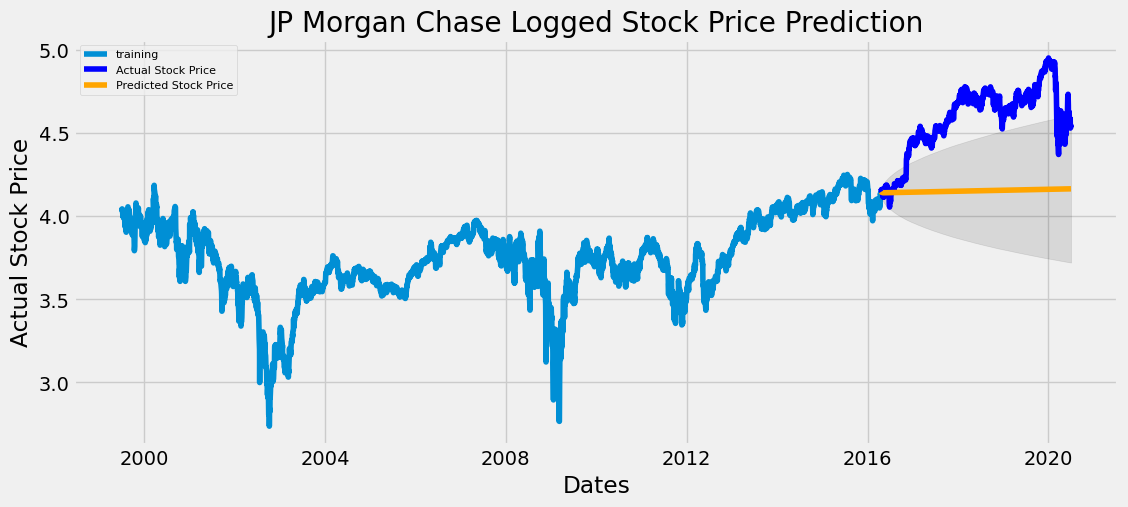

In [451]:
## Visualize the forecasted prices
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_set, label='training')
plt.plot(test_set, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('JP Morgan Chase Logged Stock Price Prediction')
plt.xlabel('Dates')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [476]:
# View predicted values
#arima_fitted.forecast(steps=10)
fc

array([[4.1455514 ],
       [4.14415582],
       [4.14307006],
       ...,
       [4.16340395],
       [4.16342666],
       [4.16344937]])

In [477]:
# Compare them to actual values
log_df.head(5)

,Close
Date,
1999-06-30,4.054679
1999-07-01,4.048155
1999-07-02,4.037921
1999-07-06,4.049609
1999-07-07,4.032765


In [478]:
#pred_arima_diff = pd.Series(arima_fitted.fittedvalues, copy=True)
#pred_arima_diff_cumsum = pred_arima_diff.cumsum()    # Convert to cumulative sum
# Add cumulative sum to original logged values
#pred_arima_log = pd.Series(log_df['Close'].iloc[0], index=log_df.index)
#pred_arima_log = pred_arima_log.add(pred_arima_diff_cumsum, fill_value=0)
#pred_arima = np.exp(pred_arima_log)
#plt.plot(dataframe)
#plt.plot(pred_arima)
#plt.title('RMSE: %.4f'% np.sqrt(sum((pred_arima-dataframe['Close'])**2)/len(dataframe)))
#arima_fitted.plot_predict(1058)

#### **d. Time Series Model Evaluation**

The commonly used accuracy metrics to evaluate forecasts are:
- Mean Absolute Percentage Error (MAPE)
- Mean Squared Error (MSE): the difference between the original and predicted values extracted by squared the average difference over the data set
- Mean Absolute Error (MAE): the difference between the original and predicted values extracted by averaged the absolute difference over the data set
- Mean Percentage Error (MPE)
- Root Mean Squared Error (RMSE)
- Lag 1 Autocorrelation of Error (ACF1)
- Correlation between the Actual and the Predicted (corr)
- Min-Max Error (min-max)

We will take a look at some of the error scores (MAE, RMSE and MSE) to make it easy to imterpret accuracy.

In [224]:
# Import libraries for accuracy metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [486]:
# Report performance
fc = fc.reshape(1058,1)
mse = mean_squared_error(test_set, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_set, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_set, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_set)/np.abs(test_set))
print('MAPE: '+str(mape))
ts_result = [rmse, mse, mae]

MSE: 0.22414024776594163
MAE: 0.43106090283062176
RMSE: 0.4734345232087977
MAPE: Close    0.092317
dtype: float64


From the error scores, MSE is 0.2241, MAE is 0.4311, and RMSE is 0.4734, which are all very low, indicating the model has a high accuracy. MAPE is 9.23%, meaning the prediction is 90.77% accurate. This is a good result to predict stock prices.

#### **Method 2: Supervised Machine Learning Using Regression Models**

In order to predict stock prices with labeled data, supervised maching learning with regression algorithms is commonly used for this regression problem. This section will use a mix of machine learning (ML) regression algorithms and ensemble learning models:
- **Regression models**: KNN regressor, linear regression, Ridge, Lasso, SVM both simple and with kernels (rbf, poly, linear)
- **Ensemble learning models**: bagging, pasting, adaboost boosting, gradient boosting

For this section, we will use all data for JP Morgan Chase with all columns to predict 'Close' column. We will also calculate error scores for these regression models.

**- Data Preprocessing**

In [225]:
# Select data
jpm.head()

,High,Low,Open,Close,Volume
Date,,,,,
1999-06-30,57.750000,54.791668,55.416668,57.666668,7451200.0
1999-07-01,57.750000,55.958332,57.041668,57.291668,6681900.0
1999-07-02,57.541668,56.666668,56.750000,56.708332,2399100.0
1999-07-06,57.916668,56.250000,56.875000,57.375000,2863800.0
1999-07-07,57.583332,56.416668,57.125000,56.416668,4667400.0


In [226]:
jpm.describe()

,High,Low,Open,Close,Volume
count,5286.000000,5286.000000,5286.000000,5286.000000,5.286000e+03
mean,55.380912,54.110092,54.752300,54.749300,2.082194e+07
std,25.808982,25.547787,25.670805,25.672454,1.975268e+07
min,16.350000,14.960000,15.370000,15.450000,1.160400e+06
25%,38.375000,37.419998,37.900002,37.869999,9.401775e+06
50%,46.200001,45.135000,45.725000,45.730000,1.396600e+07
75%,60.970001,59.959999,60.465001,60.370001,2.502292e+07
max,141.100006,139.259995,139.899994,141.089996,2.172942e+08


Volume has significantly higher values than those of other columns. Thus, data scaling will be necessary to transform all data into the same scale for the regression models.

In [96]:
jpm.isnull().sum()       # recall checking missing data

High      0
Low       0
Open      0
Close     0
Volume    0
dtype: int64

In [97]:
print('Numbers of rows and columns are: ', jpm.shape)

Numbers of rows and columns are:  (5286, 5)


<function matplotlib.pyplot.show(*args, **kw)>

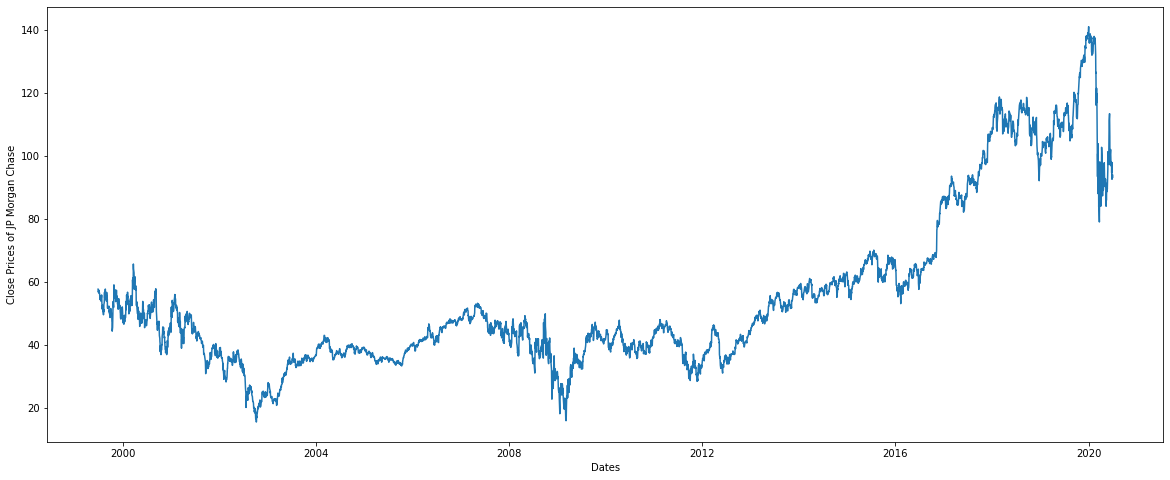

In [99]:
# Visualize close price
plt.figure(figsize=(20,8))
plt.plot(jpm['Close'])
plt.xlabel('Dates')
plt.ylabel('Close Prices of JP Morgan Chase')
plt.show

**- Feature Engineering**

In [227]:
# Set index as date values
jpm['Date'] = jpm.index
jpm['Date'] = pd.to_datetime(jpm.Date,format='%Y-%m-%d')
jpm.head(5)

,High,Low,Open,Close,Volume,Date
Date,,,,,,
1999-06-30,57.750000,54.791668,55.416668,57.666668,7451200.0,1999-06-30
1999-07-01,57.750000,55.958332,57.041668,57.291668,6681900.0,1999-07-01
1999-07-02,57.541668,56.666668,56.750000,56.708332,2399100.0,1999-07-02
1999-07-06,57.916668,56.250000,56.875000,57.375000,2863800.0,1999-07-06
1999-07-07,57.583332,56.416668,57.125000,56.416668,4667400.0,1999-07-07


In [228]:
# Sorting
data = jpm.sort_index(ascending=True, axis=0)

# Create a separate dataset using only Date and Close columns
new_data = pd.DataFrame(index=range(0,len(jpm)),columns=['Date', 'Close'])
new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data.head(5)

<ipython-input-228-007e8bb8d257>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Date'][i] = data['Date'][i]
<ipython-input-228-007e8bb8d257>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Close'][i] = data['Close'][i]


,Date,Close
0,1999-06-30,57.6667
1,1999-07-01,57.2917
2,1999-07-02,56.7083
3,1999-07-06,57.375
4,1999-07-07,56.4167


In [15]:
new_data.shape

(5286, 2)

In [16]:
# Save this new data for analysis as a csv file
new_data.to_csv('new_data.csv')

We'll be using 80% of 5,286 rows of the new dataset (4,228 rows) as the training data, the other 20% will be our testing data (1,058 rows).

In [229]:
# Determine independent variable (X) and dependent variable y
X = new_data['Date'].to_numpy().reshape(-1,1)
y = new_data['Close'].to_numpy().reshape(-1,1)

In [230]:
# Scale data using MinMaxScaler to transform data to a range of [0,1]
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# Scale X variables in both train and test data
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
print('Shape of X train: ', X_train.shape)
print('Shape of X test: ', X_test.shape)

Shape of X train:  (4228, 1)
Shape of X test:  (1058, 1)


#### **a. Regression Models**

Every regression problem is an optimization problem that tries to predict a continuous variable using predictors, thus having a **loss function (cost function)**, the main metric for accuracy of the trained model: L = ∑(Ŷi- Yi)^2 = ∑(wx + b - y)^2, where w: weight, b: bias, y: label (original).

This loss function, also known as **quadratic loss** or **least squares**, is the sum of distances between the predicted value and the actual value. The goal of the optimization problem is to minimize this loss function so that the prediction result will be as close to the acutal value as possible. **Gradient Descent** is a method that gives us a point of β (explained below) where the cost function is minimum. The model can be overfitting or underfitting. To reduce underfitting or high bias, we can add new predictors to the model to increase model complexity, thus reducing high bias and increasing variance. Simplifying the model can help reduce overfitting problem by increasing bias and decreasing variance (bias-variance tradeoff). Regularization to generalize the model also avoids overfit.

This section will apply the following machine learning regression models:
- **K-Nearest Neighbors (KNN)**: used for both classification and regression, is a non-parametric algorithm that evaluates how close testing data is the stored training data. It presumes similar things exist in **close proximity** to each other. This distance between data points can be calculated using Manhattan or Euclidean (more popular). It is very easy to implement and useful for non-linear data because there's no assumption about the data in KNN. However, it's computationally expensive and requires high memory storage as it stores all training data. It is also sensitive to scaled data and irrelevent features and takes a lot of time to train a big dataset.
- **Linear Regression**: used for regression (Logistic Regression for classification), takes various data points in a sample and provides a **"best fit" straight line** to match the general trend in the data (y = b + ax). It's mostly used to find out the relationship between the target prediction value and the independent variables. A Linear Regression has 10 assumptions:
  - **Residuals**: difference of actual and predicted values of dependent variable ~ N(0,s)
    1. Residuals should be normally distributed.
    2. Mean of residuals should be 0.
    3. Standard deviation of residuals should be constant (homoskedasticity).
    4. Residuals should not be correlated to each other (autocorrelation).
    5. Residuals should not be correlated to the independent variables.
  - **Independent Variables**:
    6. Independent variables should not be perfectly correlated to each other (multicollinearity)
    7. Independent variables should have positive variance.
    8. Number of observations or data rows should be more than number of independent variables (rows > columns).
  - **Model**:
    9. Regression model is linear in parameters or beta coefficients.
    10. Regression model should be correctly specified.
    
  Based on the dataset used in this project, there's only one independent variable (time series) to predict the dependent variable (Close price). Therefore, the indepdent variables assumptions are already violated, making it difficult for the model to work. However, for the purpose of learning and practicing Linear Regression, we will still run this model and compare its result with the other models'.
- **Ridge**: a regularized Linear Regression that overcomes overfitting problem. The loss function in this model is: L2 = ∑(Ŷi- Yi)^2 + λ∑β^2 = (wx + b - y)^2 + a(w^2) (a: **alpha** constant (>0: Ridge, =0: Linear Regression)). This addition of **"squared magnitude" of the coefficients** to the loss function **"punishes"** the function for **higher values of coefficients β**. For Ridge regression, λ here, denoted by alpha hyperparameter of Ridge regression, determines the regularization term **(L2)**.
- **Least Absolute Shrinkage Selector Operator (LASSO)**: an extension of regularized Linear Regression with the loss function as L1 = ∑(Ŷi- Yi)^2 + λ∑|β| = (wx + b - y)^2 + a|w| (a: **alpha** constant (>0: LASSO, =0: Linear Regression). LASSO takes the sum of absolute values of the coefficients, not punishing high coefficients but **setting β to 0 if they're not relevant**, leading to a model with fewer features than the one we started with (an advantage over Ridge). λ is also denoted by alpha, similar to Ridge regression, to determine the regularization term **(L1)**.
- **Suport Vector Machines (SVM)**: also known as Support Vector Networks, used for both classfication (SVC) and regression (SVR). The goal is to decide a decision boundary at 'e' distance from the original hyper plane such that data points closest to the hyper plane or support vectors are within the boundary line: yi = (w,xi) + b + e. In simpler terms, Linear Regression tries to minimize error rate while SVR tries to **fit the error within a certain threshold** by creating a best fit line, which is **the line hyper plane that has maximum data points**. SVR terms include:
  - **Kernel**: The function used to map a lower dimensional data into a higher dimensional data.
  - **Hyper Plane**: the separation line between the data classes in SVM, or the line predicting the continuous value or target value in SVR
  - **Boundary line**: the two lines besides Hyper Plane that create a margin in SVM. The support vectors can be on or ousdie the Boundary lines, which separate the two classes. SVR is similar.
  - **Support vectors**: the data points closest to the boundary. The distance of the points is minimum or lowest.
 - **Simple Support Vector Regressor (Linear SVM)**: similar to SVR with 'linear' kernel, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
 - **Kernelized Support Vector Regressors (linear, poly, rbf)**: kernels convert non-separable problems into separable problems by adding dimensions to the data, making it more flexible and accurate.
  - **Linear**: a dot product between any 2 observations: K(x,xi) = sum(x*xi)
  - **Polynomial (poly)**: generalized form of linear kernel and distinguised curved or non-linear input space: k(X,Xi) = 1 + sum(X*Xi)^d (d: degree of polynomial specified manually)
  - **Radius Basis Function (rbf)**: maps input space in indefinite dimensional space: K(x,xi) = exp(-γ*sum(x-xi^2)) (γ = [0,1])

We will use GridSearch to determine the optimal parameters for each model below.

**- KNN Regressor**

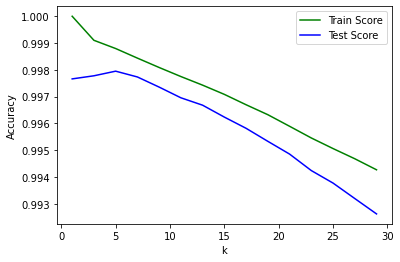

In [231]:
from sklearn.neighbors import KNeighborsRegressor

# Create arrays for train and test scores 
train_score_array = []
test_score_array = []

# Train KNN model on a range of n_neighbors
n = [i for i in range(1,30,2)]
for k in n:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

# Plot train score and test score on the range
x_axis = [i for i in range(1,30,2)]
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c='g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

The best neighbors for this model is where both train score and test score is high, and test score is closest to train score (k=5).

In [232]:
# Find best parameters
param_knn = {'n_neighbors': [i for i in range(1,30,2)], 'weights': ['uniform','distance']}
gs_knn = GridSearchCV(KNeighborsRegressor(), param_knn, cv=5, return_train_score=True)
gs_knn.fit(X_train, y_train)
print("Best parameters: {}".format(gs_knn.best_params_))
print("Best cross-validation score: {:.4f}".format(gs_knn.best_score_))

# Cross-validation
knn_scores = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(knn_scores.mean()))

Best parameters: {'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score: 0.9981
Average cross-validation score: 0.9976


We'll be using the following scores to evaluate models:
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- R-squared = (1-SSR)/SST (SSR: sum of squared residuals, SST: total squared sum): the percentage of changes in dependent variable being explained by changes in independent variables

In [233]:
from math import sqrt                  # square root function
from sklearn.metrics import r2_score   # R-squared score

In [234]:
# Train data using best parameters
best_knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

# Model evaluation
rmse_knn = sqrt(mean_squared_error(y_test, y_pred_knn))
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print('KNN Regressor:')
print('Train score: {:.4f}'.format(best_knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(best_knn.score(X_test, y_test)))
print('RMSE: {:.4f}'.format(rmse_knn))
print('Mean Squared Error: {:.4f}'.format(mse_knn))
print('Mean Absolute Error: {:.4f}'.format(mae_knn))
print('R-squared: {:.4f}'.format(r2_knn))

KNN Regressor:
Train score: 1.0000
Test score: 0.9982
RMSE: 1.0726
Mean Squared Error: 1.1505
Mean Absolute Error: 0.6885
R-squared: 0.9982


Test score is close to train score, all error scores are low while R-squared is high. This may be a good model.

No handles with labels found to put in legend.


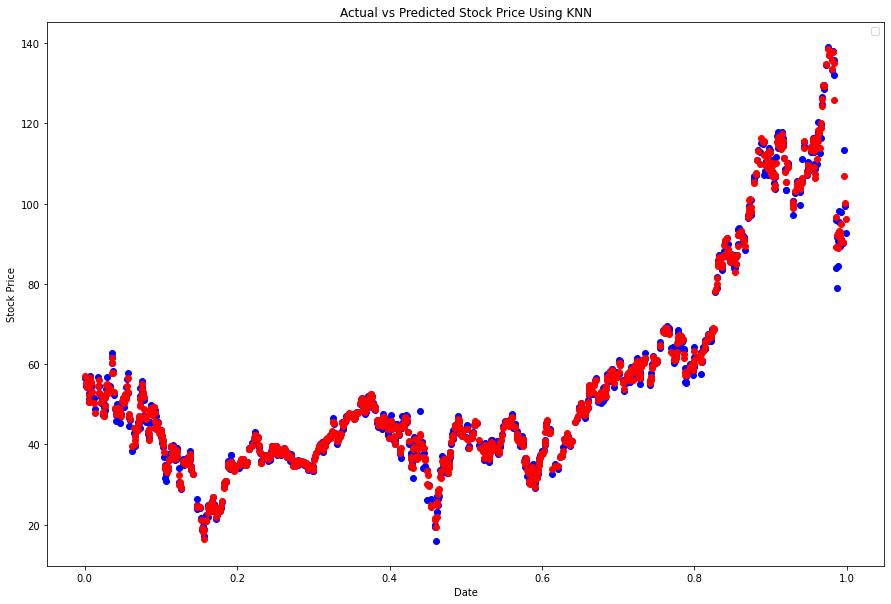

In [243]:
# Visualize KNN results
plt.figure(figsize = (15,10))
plt.title('Actual vs Predicted Stock Price Using KNN')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.scatter(list(X_test),list(y_test), color='blue')     # Actual stock prices
plt.scatter(list(X_test),list(y_pred_knn), color='red')  # Predicted stock prices
plt.show()

**- Linear Regression**

In [241]:
# Find best parameters
from sklearn.linear_model import LinearRegression

param_lr = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
gs_lr = GridSearchCV(LinearRegression(), param_lr, cv=5, return_train_score=True)
gs_lr.fit(X_train, y_train)
print("Best parameters: {}".format(gs_lr.best_params_))
print("Best cross-validation score: {:.4f}".format(gs_lr.best_score_))

# Cross-validation
lr_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=10)
print("Average cross-validation score: {:.4f}".format(lr_scores.mean()))

Best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Best cross-validation score: 0.5464
Average cross-validation score: 0.5450


In [242]:
# Train data using best parameters
best_lr = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
best_lr.fit(X_train, y_train)
y_pred_lr = best_lr.predict(X_test)

# Model evaluation
rmse_lr = sqrt(mean_squared_error(y_test, y_pred_lr))
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression:')
print('Train score: {:.4f}'.format(best_lr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(best_lr.score(X_test, y_test)))
print('RMSE: {:.4f}'.format(rmse_lr))
print('Mean Squared Error: {:.4f}'.format(mse_lr))
print('Mean Absolute Error: {:.4f}'.format(mae_lr))
print('R-squared: {:.4f}'.format(r2_lr))

Linear Regression:
Train score: 0.5468
Test score: 0.5364
RMSE: 17.2198
Mean Squared Error: 296.5199
Mean Absolute Error: 13.8724
R-squared: 0.5364


R-squared, test score and train score are low while error scores are high, indicating that the model is underfitting. This is not a good model for the stock price prediction.

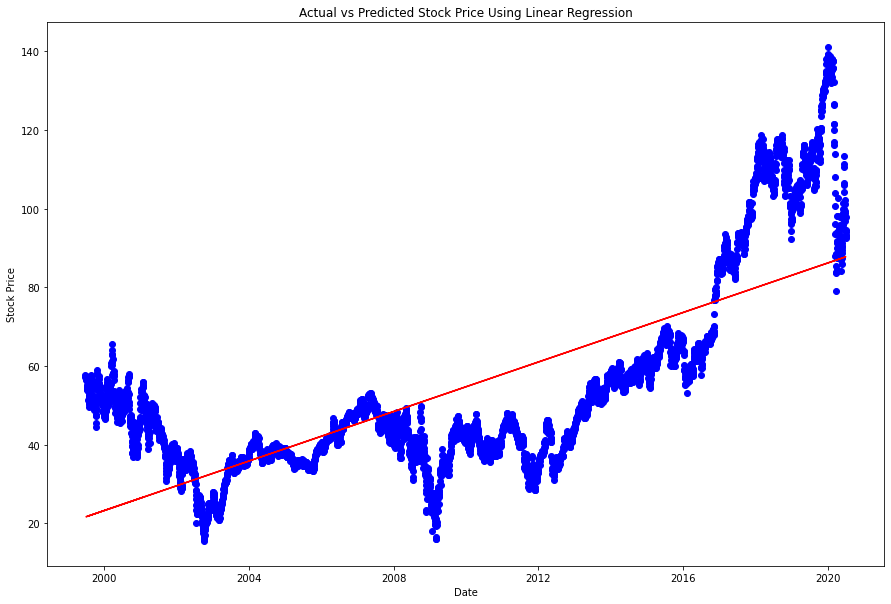

In [258]:
# Visualize Linear Regression results
plt.figure(figsize = (15,10))
plt.title('Actual vs Predicted Stock Price Using Linear Regression')
plt.scatter(X, y, color='blue') 
plt.plot(X_test_org, y_pred_lr, color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

**- Ridge Regression**

In [259]:
# Find best parameters
from sklearn.linear_model import Ridge, Lasso

param_ridge = {'alpha' : np.arange(0.5,2.0,0.2)}
gs_ridge = GridSearchCV(Ridge(), param_ridge, cv=5, n_jobs = -1, verbose = 10, return_train_score=True)
gs_ridge.fit(X_train, y_train)
print("Best parameters: {}".format(gs_ridge.best_params_))
print("Best cross-validation score: {:.4f}".format(gs_ridge.best_score_))

# Cross-validation
ridge_scores = cross_val_score(Ridge(), X_train, y_train, cv=10)
print("Average cross-validation score: {:.4f}".format(ridge_scores.mean()))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.2s


Best parameters: {'alpha': 0.5}
Best cross-validation score: 0.5464
Average cross-validation score: 0.5450


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1919s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:    5.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.4s finished


In [260]:
# Train data using best parameters
best_ridge = Ridge(alpha=0.5)
best_ridge.fit(X_train, y_train)
y_pred_ridge = best_ridge.predict(X_test)

# Model evaluation
rmse_ridge = sqrt(mean_squared_error(y_test, y_pred_ridge))
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('Ridge Regression:')
print('Train score: {:.4f}'.format(best_ridge.score(X_train, y_train)))
print('Test score: {:.4f}'.format(best_ridge.score(X_test, y_test)))
print('RMSE: {:.4f}'.format(rmse_ridge))
print('Mean Squared Error: {:.4f}'.format(mse_ridge))
print('Mean Absolute Error: {:.4f}'.format(mae_ridge))
print('R-squared: {:.4f}'.format(r2_ridge))

Ridge Regression:
Train score: 0.5468
Test score: 0.5364
RMSE: 17.2185
Mean Squared Error: 296.4770
Mean Absolute Error: 13.8701
R-squared: 0.5364


R-squared, test score and train score are low while error scores are high, indicating that the model is underfitting. This also may not be a good model.

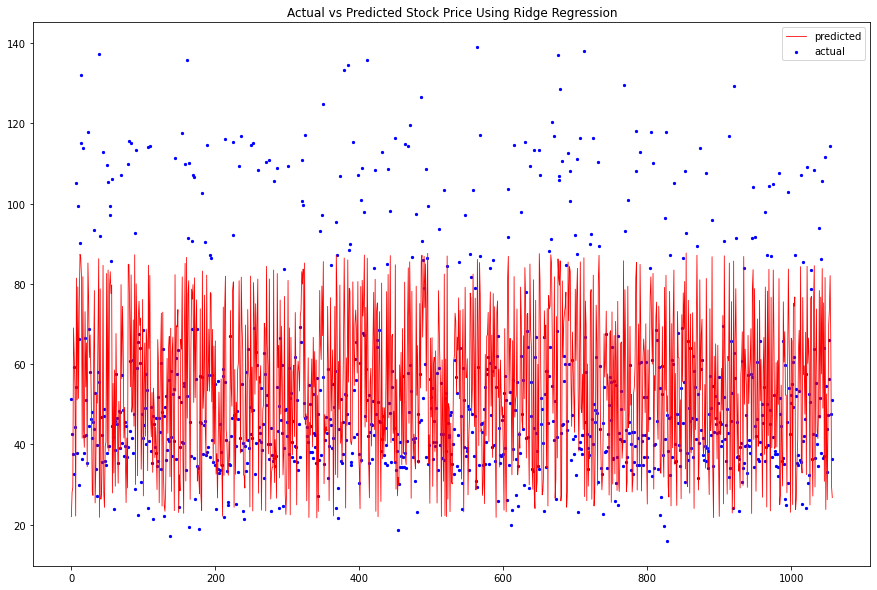

In [266]:
# Visualize Ridge Regression results
plt.figure(figsize = (15,10))
plt.title('Actual vs Predicted Stock Price Using Ridge Regression')
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="actual")
plt.plot(x_ax, y_pred_ridge,lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

**- LASSO Regression**

In [261]:
# Find best parameters
param_lasso = {'alpha' : np.arange(0.5,2.0,0.2)}
gs_lasso = GridSearchCV(Lasso(), param_lasso, cv=10, n_jobs = -1, verbose = 10, return_train_score=True)
gs_lasso.fit(X_train, y_train)
print("Best parameters: {}".format(gs_lasso.best_params_))
print("Best cross-validation score: {:.4f}".format(gs_lasso.best_score_))

# Cross-validation
lasso_scores = cross_val_score(Lasso(), X_train, y_train, cv=10)
print("Average cross-validation score: {:.4f}".format(lasso_scores.mean()))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0598s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1982s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1626s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.5s


Best parameters: {'alpha': 0.5}
Best cross-validation score: 0.5407
Average cross-validation score: 0.5272


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.7s finished


In [262]:
# Train data using best parameters
best_lasso = Lasso(alpha=0.5)
best_lasso.fit(X_train, y_train)
y_pred_lasso = best_lasso.predict(X_test)

# Model evaluation
rmse_lasso = sqrt(mean_squared_error(y_test, y_pred_lasso))
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('Lasso Regression:')
print('Train score: {:.4f}'.format(best_lasso.score(X_train, y_train)))
print('Test score: {:.4f}'.format(best_lasso.score(X_test, y_test)))
print('RMSE: {:.4f}'.format(rmse_lasso))
print('Mean Squared Error: {:.4f}'.format(mse_lasso))
print('Mean Absolute Error: {:.4f}'.format(mae_lasso))
print('R-squared: {:.4f}'.format(r2_lasso))

Lasso Regression:
Train score: 0.5423
Test score: 0.5359
RMSE: 17.2289
Mean Squared Error: 296.8333
Mean Absolute Error: 13.7773
R-squared: 0.5359


R-squared, test score and train score are low while error scores are high, indicating that the model is underfitting. This may not be a good model.

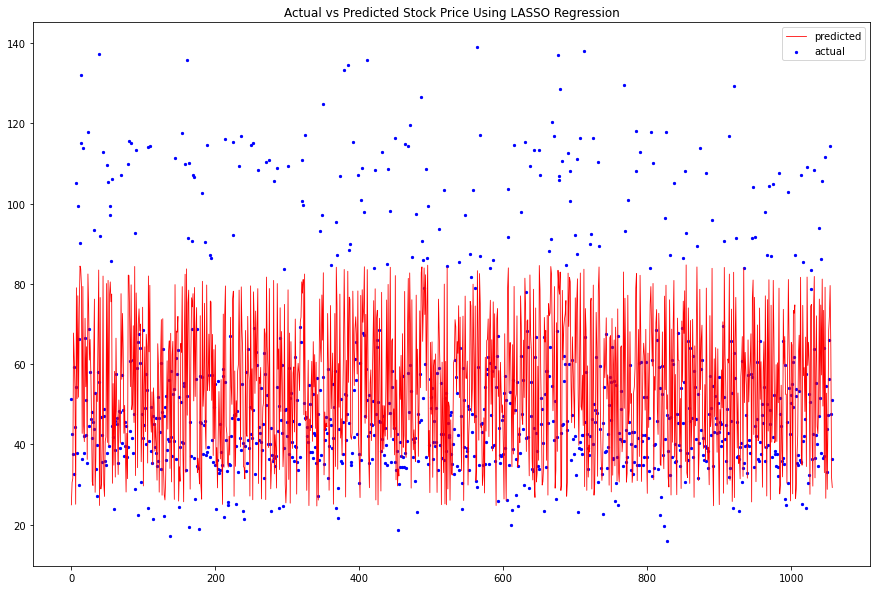

In [265]:
# Visualize LASSO Regression results
plt.figure(figsize = (15,10))
plt.title('Actual vs Predicted Stock Price Using LASSO Regression')
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="actual")
plt.plot(x_ax, y_pred_lasso,lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

**- Support Vector Machine**

In [267]:
# Find best parameters
from sklearn.svm import LinearSVR

param_svr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
gs_svr = GridSearchCV(LinearSVR(), param_svr, cv=5, return_train_score=True)
gs_svr.fit(X_train, y_train.ravel())
print("Best parameters: {}".format(gs_svr.best_params_))
print("Best cross-validation score: {:.4f}".format(gs_svr.best_score_))

# Cross-validation
svr_scores = cross_val_score(LinearSVR(), X_train, y_train.ravel(), cv=5)
print("Average cross-validation score: {:.4f}".format(svr_scores.mean()))

Best parameters: {'C': 100}
Best cross-validation score: 0.4717
Average cross-validation score: 0.4605


In [268]:
# Train data using best parameters
best_svr = LinearSVR(C=100)
best_svr.fit(X_train, y_train.ravel())
y_pred_svr = best_svr.predict(X_test)

# Model evaluation
rmse_svr = sqrt(mean_squared_error(y_test, y_pred_svr))
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print('LinearSVR Regression:')
print('Train score: {:.4f}'.format(best_svr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(best_svr.score(X_test, y_test)))
print('RMSE: {:.4f}'.format(rmse_svr))
print('Mean Squared Error: {:.4f}'.format(mse_svr))
print('Mean Absolute Error: {:.4f}'.format(mae_svr))
print('R-squared: {:.4f}'.format(r2_svr))

LinearSVR Regression:
Train score: 0.4729
Test score: 0.4664
RMSE: 18.4737
Mean Squared Error: 341.2782
Mean Absolute Error: 12.9966
R-squared: 0.4664


R-squared, test score and train score are very low while error scores are high. The model is underfitting and may not be a good model.

**- Kernelized Support Vector Machines (linear, poly, rbf)**

In [269]:
# Find best parameters
from sklearn.svm import SVR

param_kernel = {'kernel' : ['linear','poly', 'rbf']}
gs_kernel = GridSearchCV(SVR(), param_kernel, cv=5, n_jobs = -1,verbose = 10, return_train_score=True)
gs_kernel.fit(X_train, y_train.ravel())
print("Best parameters: {}".format(gs_kernel.best_params_))
print("Best cross-validation score: {:.4f}".format(gs_kernel.best_score_))

# Cross-validation
kernel_scores = cross_val_score(SVR(), X_train, y_train.ravel(), cv=5)
print("Average cross-validation score: {:.4f}".format(kernel_scores.mean()))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:    9.3s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   10.0s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   11.1s finished


Best parameters: {'kernel': 'rbf'}
Best cross-validation score: 0.9159
Average cross-validation score: 0.9159


In [270]:
# Choose 'rbf' kernel and find best parameters

param_rbf = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
gs_rbf = GridSearchCV(SVR(kernel='rbf'), param_rbf, cv=5, return_train_score=True)
gs_rbf.fit(X_train, y_train.ravel())
print("Best parameters: {}".format(gs_rbf.best_params_))
print("Best cross-validation score: {:.4f}".format(gs_rbf.best_score_))

# Cross-validation
rbf_scores = cross_val_score(SVR(kernel='rbf'), X_train, y_train.ravel(), cv=5)
print("Average cross-validation score: {:.4f}".format(rbf_scores.mean()))

Best parameters: {'C': 100, 'gamma': 100}
Best cross-validation score: 0.9605
Average cross-validation score: 0.9159


In [271]:
# Train data using best parameters
best_rbf = SVR(C=100, gamma=100)
best_rbf.fit(X_train, y_train.ravel())
y_pred_rbf = best_rbf.predict(X_test)

# Model evaluation
rmse_rbf = sqrt(mean_squared_error(y_test, y_pred_rbf))
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)

print("SVR 'rbf' Regression: ")
print('Train score: {:.4f}'.format(best_rbf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(best_rbf.score(X_test, y_test)))
print('RMSE: {:.4f}'.format(rmse_rbf))
print('Mean Squared Error: {:.4f}'.format(mse_rbf))
print('Mean Absolute Error: {:.4f}'.format(mae_rbf))
print('R-squared: {:.4f}'.format(r2_rbf))

SVR 'rbf' Regression: 
Train score: 0.9616
Test score: 0.9605
RMSE: 5.0271
Mean Squared Error: 25.2721
Mean Absolute Error: 3.3852
R-squared: 0.9605


R-squared, test score and train score are all high while error scores are low, indicating that this may be a good model. This SVR model with 'rbf' kernel also performs a lot better than Linear SVR.

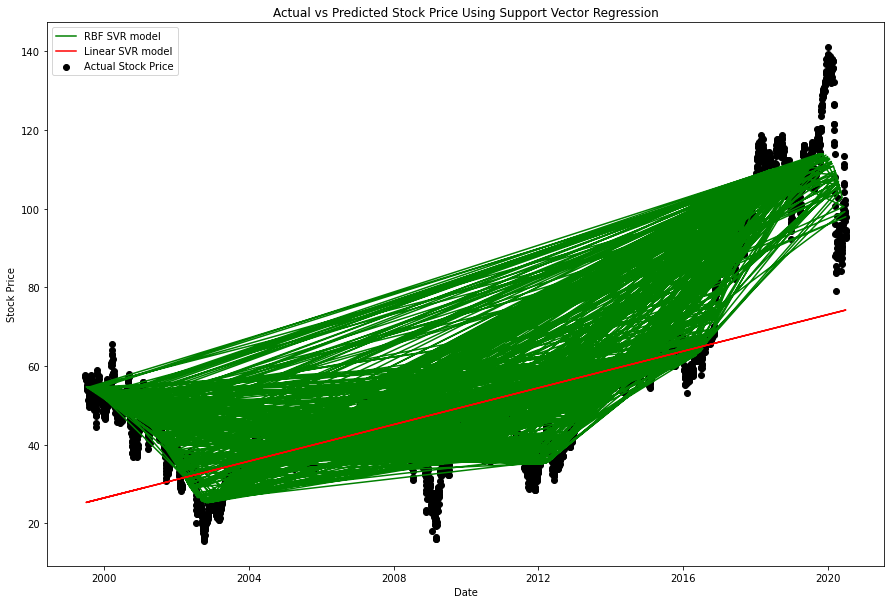

In [277]:
# Visualize SVR model results
plt.figure(figsize = (15,10))
plt.title('Actual vs Predicted Stock Price Using Support Vector Regression')
plt.scatter(X, y, c='k', label='Actual Stock Price')
plt.plot(X_test_org, y_pred_rbf, c='g', label='RBF SVR model')
plt.plot(X_test_org, y_pred_svr, c='r', label='Linear SVR model')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**- Model Evaluation**

In [374]:
knn = [rmse_knn, mse_knn, mae_knn, r2_knn]
lr = [rmse_lr, mse_lr, mae_lr, r2_lr]
ridge = [rmse_ridge, mse_ridge, mae_ridge, r2_ridge]
lasso = [rmse_lasso, mse_lasso, mae_lasso, r2_lasso]
svr = [rmse_svr, mse_svr, mae_svr, r2_svr]
rbf = [rmse_rbf, mse_rbf, mae_rbf, r2_rbf]
results = pd.DataFrame([knn,lr,ridge,lasso,svr,rbf], index = ['KNN', 'Linear Regression', 'Ridge', 'LASSO', 'SVR', 'SVR with rbf kernel'], columns = ['RMSE', 'MSE', 'MAE', 'R2'])
print("Score Evaluation Report for Regression Models: ")
results.sort_values('MSE')

Score Evaluation Report for Regression Models: 


,RMSE,MSE,MAE,R2
KNN,1.072616,1.150505,0.688455,0.998201
SVR with rbf kernel,5.027134,25.272076,3.385245,0.960486
Ridge,17.218507,296.476968,13.870114,0.536442
Linear Regression,17.219752,296.519872,13.872433,0.536375
LASSO,17.228852,296.833343,13.777300,0.535885
SVR,18.434877,339.844678,12.995900,0.468635


Let's recall the meaning of each score:
- Root Mean Squared Error (RMSE): the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are (RMSE = √[Σ(Pi – Oi)^2/n])
- Mean Squared Error (MSE): the difference between the original and predicted values extracted by squared the average difference over the data set (the average of the squares of the errors) (MSE(θobs,i) = E[(θobs,i – θ)^2])
- Mean Absolute Error (MAE): the difference between the original and predicted values extracted by averaged the absolute difference over the data set (the average of the absolutes of the errors) (MAE = (∑ᵢ₌₁ⁿ|yᵢ-y^ᵢ|)/n=∑ᵢ₌₁ⁿ|eᵢ|/n)
- R-squared (R2): the proportion of the variance for a dependent variable that's explained by an independent variable (R2 = 1 - Σ(y_actual - y_pred)^2/Σ(y_actual - y_mean)^2

From the result report, it's clear that KNN has the lowest RMSE, MSE and MAE and the highest R2, followed by SVR with 'rbf' kernel while simple SVR has the lowest R2 and the highest error scores. Thus, KNN and SVR with 'rbf' kernel are the best regression models and will be used for ensemble learning models to see if the models can be improved.

#### **b. Ensemble Learning Models**

Ensemble learning methods use multiple learning algorithms to achieve better predictive performance than those obtained from any of the learning algorithms alone. 

Some of the ensemble models used in this project are:
- **Bagging (Bootstrap Aggregating)**: take multiple **random subsets** of the training dataset **with replacement** to **improve the accuracy** and make the model more generalize by **reducing the variance** (eg. by avoiding overfitting) (which may **increase bias**). For each subset, we take a model with the same learning algorithms (KNN and SVR with 'rbf' kernel in this project) then aggregate them with equal weights. Bagging is more suitable for small datasets and may be computationally expensive since we must use multiple models. In short, bagging is taking individual models in a **parallel** way where each model is trained by a subset of data.
- **Pasting**: bagging **without using replacement** (each subset can be used once), which is more suitable for large datasets.
- **Boosting**: the family of a ML algorithm that **converts weak learners (base learners) to strong learners**, used to **reduce the bias and variance** (which have a negative correlation) in a supervised learning technique - take records from dataset and pass them to the base learners sequentially. Boosting can be hard to implement in real-time due to its complexity. Its high flexibility may result in multiple parameters than a direct effect on the behavior of the model. In short, boosting is taking individual models in a **sequential** way where each model **learns from mistakes** made by the previous models.
 - **Adaboost**: learn from the mistakes where the weights of instances are adjusted according to the error of the current prediction. 
 - **Gradient Boosting**: learn from the mistake — residual error directly, rather than update the weights of data points.
 
Details of each methods are shown below:

**- Bagging**

In [278]:
# Bagging using best parameters of KNN
from sklearn.ensemble import BaggingRegressor

best_knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
bag_knn = BaggingRegressor(best_knn, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)
bag_knn.fit(X_train, y_train.ravel())
y_pred_bag_knn = bag_knn.predict(X_test)

# Model evaluation
rmse_bag_knn = sqrt(mean_squared_error(y_test, y_pred_bag_knn))
mse_bag_knn = mean_squared_error(y_test, y_pred_bag_knn)
mae_bag_knn = mean_absolute_error(y_test, y_pred_bag_knn)
r2_bag_knn = r2_score(y_test, y_pred_bag_knn)

print("Bagging Regression with KNN: ")
print('RMSE: {:.4f}'.format(rmse_bag_knn))
print('Mean Squared Error: {:.4f}'.format(mse_bag_knn))
print('Mean Absolute Error: {:.4f}'.format(mae_bag_knn))
print('R-squared: {:.4f}'.format(r2_bag_knn))

Bagging Regression with KNN: 
RMSE: 3.8890
Mean Squared Error: 15.1246
Mean Absolute Error: 2.5716
R-squared: 0.9764


This seems to be a good model with a high R-squared and low error scores.

No handles with labels found to put in legend.


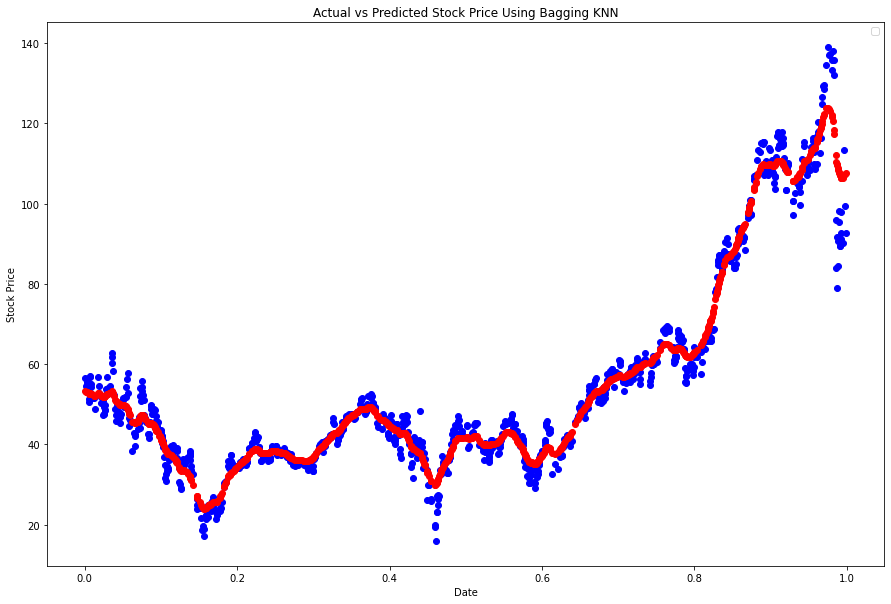

In [280]:
# Visualize Bagging KNN results
plt.figure(figsize = (15,10))
plt.title('Actual vs Predicted Stock Price Using Bagging KNN')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.scatter(list(X_test),list(y_test), color='blue', label='actual')    
plt.scatter(list(X_test),list(y_pred_bag_knn), color='red', label='predicted')  
plt.show()

In [281]:
# Bagging using best parameters of SVR with 'rbf' kernel
best_rbf = SVR(C=100, gamma=100)
bag_rbf = BaggingRegressor(best_rbf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)
bag_rbf.fit(X_train, y_train.ravel())
y_pred_bag_rbf = bag_rbf.predict(X_test)

# Model evaluation
rmse_bag_rbf = sqrt(mean_squared_error(y_test, y_pred_bag_rbf))
mse_bag_rbf = mean_squared_error(y_test, y_pred_bag_rbf)
mae_bag_rbf = mean_absolute_error(y_test, y_pred_bag_rbf)
r2_bag_rbf = r2_score(y_test, y_pred_bag_rbf)

print("Bagging Regression with SVR with 'rbf' kernel: ")
print('RMSE: {:.4f}'.format(rmse_bag_rbf))
print('Mean Squared Error: {:.4f}'.format(mse_bag_rbf))
print('Mean Absolute Error: {:.4f}'.format(mae_bag_rbf))
print('R-squared: {:.4f}'.format(r2_bag_rbf))

Bagging Regression with SVR with 'rbf' kernel: 
RMSE: 5.3603
Mean Squared Error: 28.7330
Mean Absolute Error: 3.6769
R-squared: 0.9551


This is also a good model with a high R-squared, but error squares seem to be higher than other models.

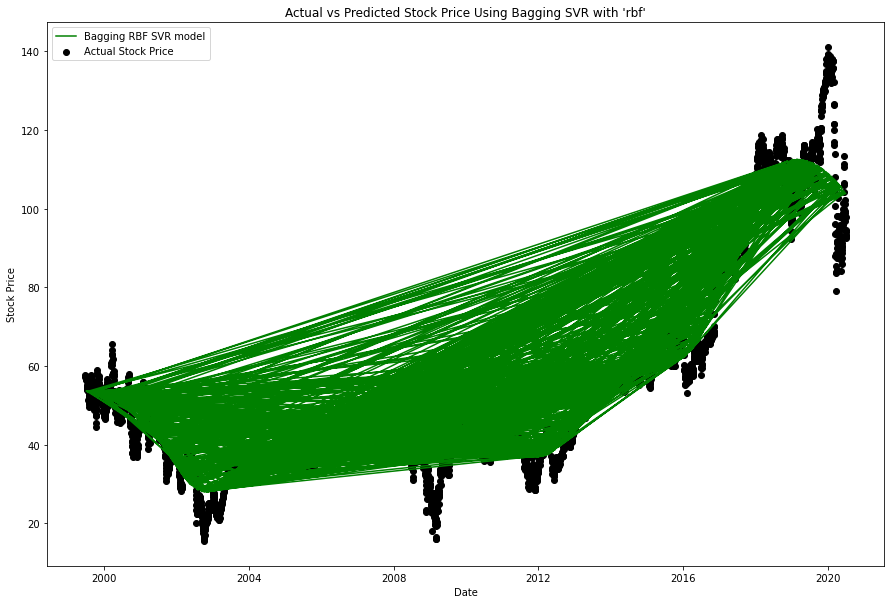

In [282]:
# Visualize Bagging SVR with 'rbf' model results
plt.figure(figsize = (15,10))
plt.title("Actual vs Predicted Stock Price Using Bagging SVR with 'rbf'")
plt.scatter(X, y, c='k', label='Actual Stock Price')
plt.plot(X_test_org, y_pred_bag_rbf, c='g', label='Bagging RBF SVR model')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**- Pasting**

In [283]:
# Pasting using best parameters of KNN
from sklearn.ensemble import BaggingRegressor

best_knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
paste_knn = BaggingRegressor(best_knn, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)
paste_knn.fit(X_train, y_train.ravel())
y_pred_paste_knn = paste_knn.predict(X_test)

# Model evaluation
rmse_paste_knn = sqrt(mean_squared_error(y_test, y_pred_paste_knn))
mse_paste_knn = mean_squared_error(y_test, y_pred_paste_knn)
mae_paste_knn = mean_absolute_error(y_test, y_pred_paste_knn)
r2_paste_knn = r2_score(y_test, y_pred_paste_knn)

print("Pasting Regression with KNN: ")
print('RMSE: {:.4f}'.format(rmse_paste_knn))
print('Mean Squared Error: {:.4f}'.format(mse_paste_knn))
print('Mean Absolute Error: {:.4f}'.format(mae_paste_knn))
print('R-squared: {:.4f}'.format(r2_paste_knn))

Pasting Regression with KNN: 
RMSE: 3.8902
Mean Squared Error: 15.1336
Mean Absolute Error: 2.5713
R-squared: 0.9763


The model results are good, not the best but also not the worst.

No handles with labels found to put in legend.


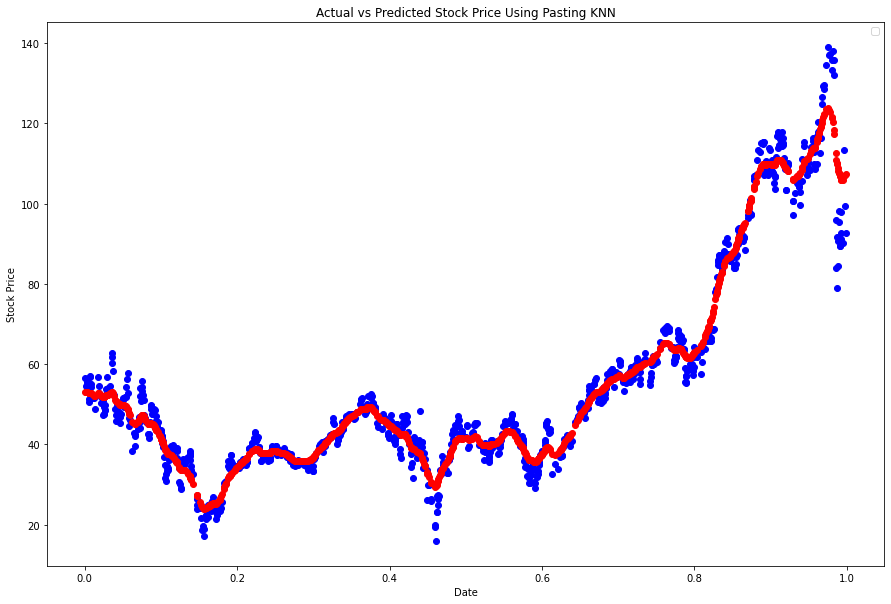

In [293]:
# Visualize Pasting KNN results
plt.figure(figsize = (15,10))
plt.title('Actual vs Predicted Stock Price Using Pasting KNN')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.scatter(list(X_test),list(y_test), color='blue', label='actual')    
plt.scatter(list(X_test),list(y_pred_paste_knn), color='red', label='predicted')  
plt.show()

In [284]:
# Pasting using best parameters of SVR with 'rbf' kernel
best_rbf = SVR(C=100, gamma=100)
paste_rbf = BaggingRegressor(best_rbf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)
paste_rbf.fit(X_train, y_train.ravel())
y_pred_paste_rbf = paste_rbf.predict(X_test)

# Model evaluation
rmse_paste_rbf = sqrt(mean_squared_error(y_test, y_pred_paste_rbf))
mse_paste_rbf = mean_squared_error(y_test, y_pred_paste_rbf)
mae_paste_rbf = mean_absolute_error(y_test, y_pred_paste_rbf)
r2_paste_rbf = r2_score(y_test, y_pred_paste_rbf)

print("Pasting Regression with SVR with 'rbf' kernel: ")
print('RMSE: {:.4f}'.format(rmse_paste_rbf))
print('Mean Squared Error: {:.4f}'.format(mse_paste_rbf))
print('Mean Absolute Error: {:.4f}'.format(mae_paste_rbf))
print('R-squared: {:.4f}'.format(r2_paste_rbf))

Pasting Regression with SVR with 'rbf' kernel: 
RMSE: 5.3536
Mean Squared Error: 28.6608
Mean Absolute Error: 3.6718
R-squared: 0.9552


This model has a high R-squared but the errors also seem to be high compared to other model results.

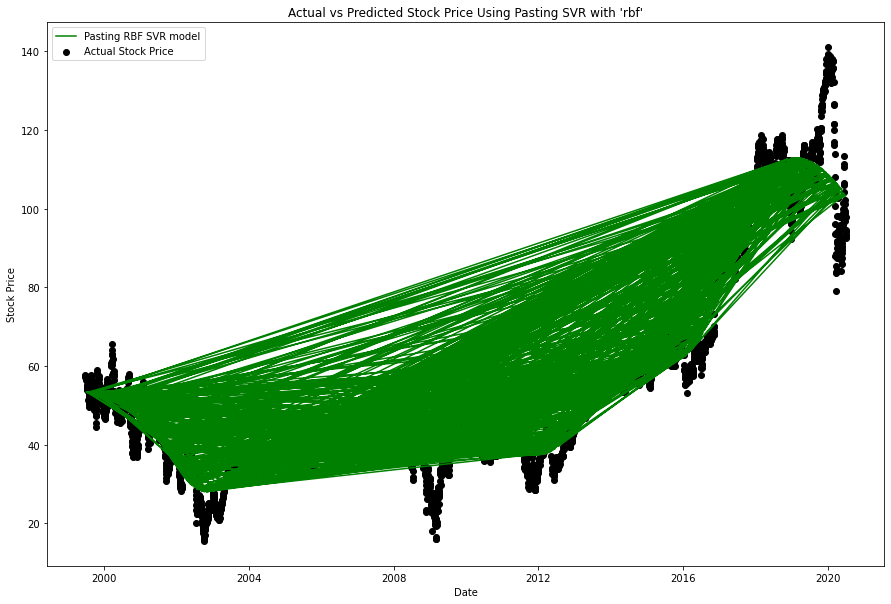

In [291]:
# Visualize Pasting SVR with 'rbf' model results
plt.figure(figsize = (15,10))
plt.title("Actual vs Predicted Stock Price Using Pasting SVR with 'rbf'")
plt.scatter(X, y, c='k', label='Actual Stock Price')
plt.plot(X_test_org, y_pred_paste_rbf, c='g', label='Pasting RBF SVR model')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**- Adaboost Boosting**

In [285]:
# Adaboost using best parameters of KNN
from sklearn.ensemble import AdaBoostRegressor

best_knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
adaboost_knn = AdaBoostRegressor(best_knn)
adaboost_knn.fit(X_train, y_train.ravel())
y_pred_adaboost_knn = adaboost_knn.predict(X_test)

# Model evaluation
rmse_adaboost_knn = sqrt(mean_squared_error(y_test, y_pred_adaboost_knn))
mse_adaboost_knn = mean_squared_error(y_test, y_pred_adaboost_knn)
mae_adaboost_knn = mean_absolute_error(y_test, y_pred_adaboost_knn)
r2_adaboost_knn = r2_score(y_test, y_pred_adaboost_knn)

print("Adaboost Boosting Regression with KNN: ")
print('RMSE: {:.4f}'.format(rmse_adaboost_knn))
print('Mean Squared Error: {:.4f}'.format(mse_adaboost_knn))
print('Mean Absolute Error: {:.4f}'.format(mae_adaboost_knn))
print('R-squared: {:.4f}'.format(r2_adaboost_knn))

Adaboost Boosting Regression with KNN: 
RMSE: 1.0850
Mean Squared Error: 1.1772
Mean Absolute Error: 0.6917
R-squared: 0.9982


The model has very good results with a high R-squared and very low error scores.

No handles with labels found to put in legend.


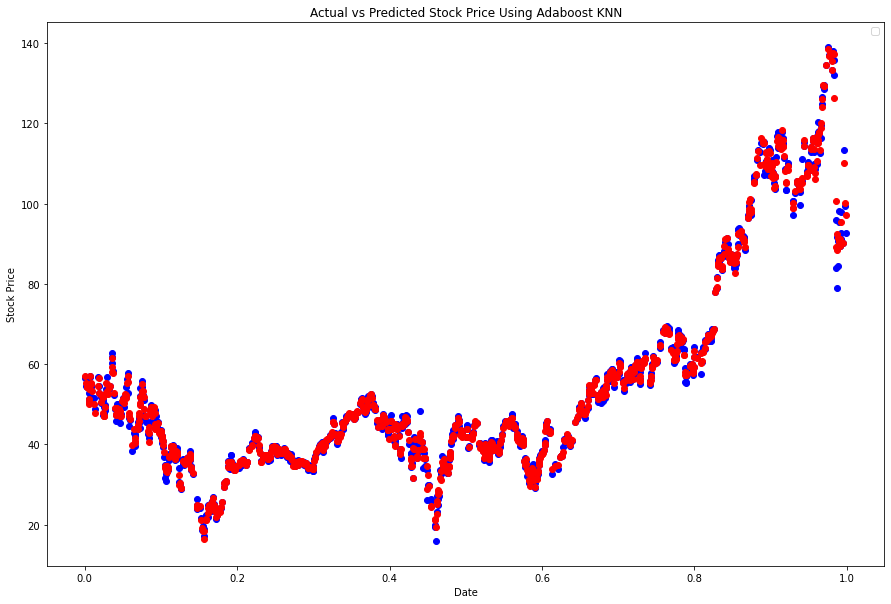

In [294]:
# Visualize Adaboost KNN results
plt.figure(figsize = (15,10))
plt.title('Actual vs Predicted Stock Price Using Adaboost KNN')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.scatter(list(X_test),list(y_test), color='blue', label='actual')    
plt.scatter(list(X_test),list(y_pred_adaboost_knn), color='red', label='predicted')  
plt.show()

In [286]:
# Adaboost using best parameters of SVR with 'rbf' kernel
best_rbf = SVR(C=100, gamma=100)
adaboost_rbf = BaggingRegressor(best_rbf)
adaboost_rbf.fit(X_train, y_train.ravel())
y_pred_adaboost_rbf = adaboost_rbf.predict(X_test)

# Model evaluation
rmse_adaboost_rbf = sqrt(mean_squared_error(y_test, y_pred_adaboost_rbf))
mse_adaboost_rbf = mean_squared_error(y_test, y_pred_adaboost_rbf)
mae_adaboost_rbf = mean_absolute_error(y_test, y_pred_adaboost_rbf)
r2_adaboost_rbf = r2_score(y_test, y_pred_adaboost_rbf)

print("Adaboost Boosting Regression with SVR with 'rbf' kernel: ")
print('RMSE: {:.4f}'.format(rmse_adaboost_rbf))
print('Mean Squared Error: {:.4f}'.format(mse_adaboost_rbf))
print('Mean Absolute Error: {:.4f}'.format(mae_adaboost_rbf))
print('R-squared: {:.4f}'.format(r2_adaboost_rbf))

Adaboost Boosting Regression with SVR with 'rbf' kernel: 
RMSE: 5.0323
Mean Squared Error: 25.3237
Mean Absolute Error: 3.3848
R-squared: 0.9604


The results are good but moderate compared to other model results.

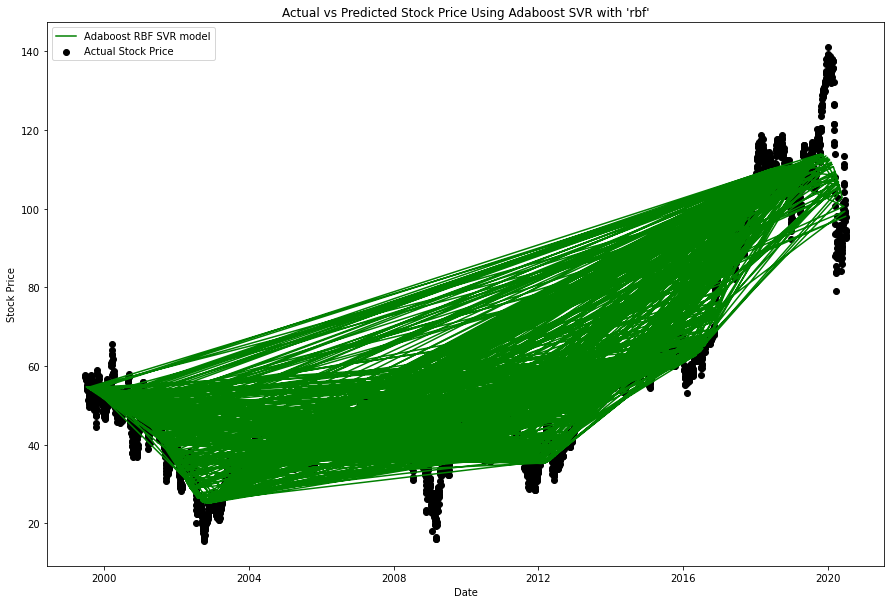

In [292]:
# Visualize Adaboost SVR with 'rbf' model results
plt.figure(figsize = (15,10))
plt.title("Actual vs Predicted Stock Price Using Adaboost SVR with 'rbf'")
plt.scatter(X, y, c='k', label='Actual Stock Price')
plt.plot(X_test_org, y_pred_adaboost_rbf, c='g', label='Adaboost RBF SVR model')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**- Gradient Boosting**

In [287]:
# Find best parameters
from  sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
param_gb = {'max_depth':[1,2,3], 'n_estimators':[100,200], 'learning_rate':[0.8, 1.0]}
gs_gb = GridSearchCV(gb, param_gb, cv=5)
gs_gb.fit(X_train, y_train.ravel())
print("Best parameters: {}".format(gs_gb.best_params_))
print("Best cross-validation score: {:.4f}".format(gs_gb.best_score_))

# Cross-validation
gb_scores = cross_val_score(gb, X_train, y_train.ravel(), cv=5)
print("Average cross-validation score: {:.4f}".format(gb_scores.mean()))

Best parameters: {'learning_rate': 0.8, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation score: 0.9975
Average cross-validation score: 0.9919


In [288]:
# Train data using best parameters
best_gb = GradientBoostingRegressor(learning_rate=0.8, max_depth=3, n_estimators=200)
best_gb.fit(X_train, y_train.ravel())
y_pred_gb = best_gb.predict(X_test)

# Model evaluation
rmse_gb = sqrt(mean_squared_error(y_test, y_pred_gb))
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression: ")
print('Train score: {:.4f}'.format(best_gb.score(X_train, y_train)))
print('Test score: {:.4f}'.format(best_gb.score(X_test, y_test)))
print('RMSE: {:.4f}'.format(rmse_gb))
print('Mean Squared Error: {:.4f}'.format(mse_gb))
print('Mean Absolute Error: {:.4f}'.format(mae_gb))
print('R-squared: {:.4f}'.format(r2_gb))

Gradient Boosting Regression: 
Train score: 0.9995
Test score: 0.9975
RMSE: 1.2680
Mean Squared Error: 1.6079
Mean Absolute Error: 0.8180
R-squared: 0.9975


This model has very good results with a high R-squared and low error scores.

No handles with labels found to put in legend.


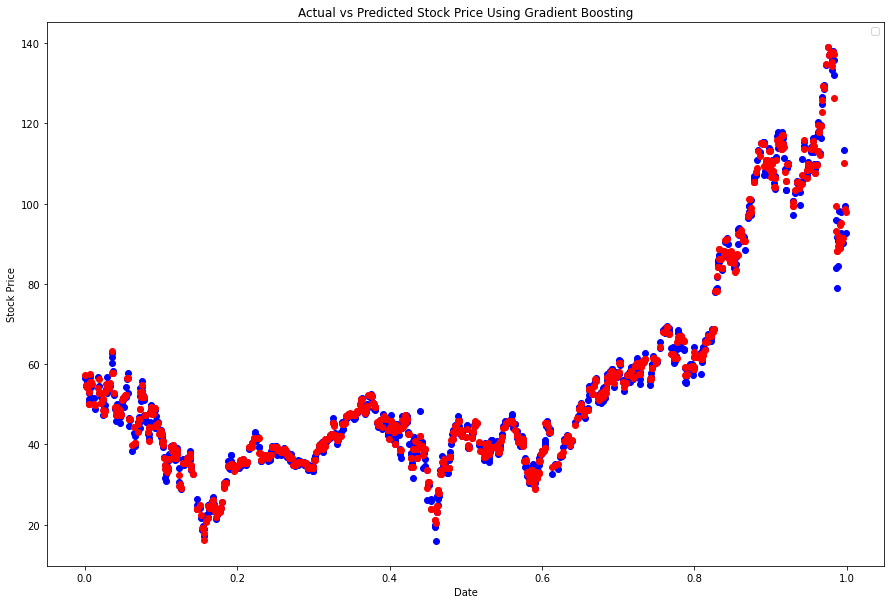

In [295]:
# Visualize Gradient Boosting results
plt.figure(figsize = (15,10))
plt.title('Actual vs Predicted Stock Price Using Gradient Boosting')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.scatter(list(X_test),list(y_test), color='blue', label='actual')    
plt.scatter(list(X_test),list(y_pred_gb), color='red', label='predicted')  
plt.show()

**- Model Evaluation**

In [397]:
# Combine result table with new results
bagknn = [rmse_bag_knn, mse_bag_knn, mae_bag_knn, r2_bag_knn]
bagrbf = [rmse_bag_rbf, mse_bag_rbf, mae_bag_rbf, r2_bag_rbf]
pasteknn = [rmse_paste_knn, mse_paste_knn, mae_paste_knn, r2_paste_knn]
pasterbf = [rmse_paste_rbf, mse_paste_rbf, mae_paste_rbf, r2_paste_rbf]
abknn = [rmse_adaboost_knn, mse_adaboost_knn, mae_adaboost_knn, r2_adaboost_knn]
abrbf = [rmse_adaboost_rbf, mse_adaboost_rbf, mae_adaboost_rbf, r2_adaboost_rbf] 
grb = [rmse_gb, mse_gb, mae_gb, r2_gb]
new_results = pd.DataFrame([bagknn, bagrbf, pasteknn, pasterbf, abknn, abrbf, grb], index=['KNN Bagging', 'rbf Bagging', 'KNN Pasting', 'rbf Pasting', 'KNN Adaboost', 'rbf Adaboost', 'Gradient Boosting'], columns=['RMSE', 'MSE', 'MAE', 'R2'])
new_results.sort_values('MSE')

,RMSE,MSE,MAE,R2
KNN Adaboost,1.083344,1.173634,0.690375,0.998165
Gradient Boosting,1.268023,1.607882,0.817958,0.997486
KNN Bagging,3.889038,15.124615,2.571555,0.976352
KNN Pasting,3.890191,15.133584,2.571315,0.976338
rbf Adaboost,5.055765,25.560762,3.394725,0.960034
rbf Pasting,5.353574,28.660758,3.671767,0.955187
rbf Bagging,5.360317,28.733002,3.676871,0.955074


The result table shows that KNN Adaboost Boosting is the best model with the highest R-squared and the lowest error scores, followed by Gradient Boosting. Let's combine the two result tables.

In [400]:
frames = [results, new_results]
table = pd.concat(frames)
table.sort_values('MSE')

,RMSE,MSE,MAE,R2
KNN,1.072616,1.150505,0.688455,0.998201
KNN Adaboost,1.083344,1.173634,0.690375,0.998165
Gradient Boosting,1.268023,1.607882,0.817958,0.997486
KNN Bagging,3.889038,15.124615,2.571555,0.976352
KNN Pasting,3.890191,15.133584,2.571315,0.976338
SVR with rbf kernel,5.027134,25.272076,3.385245,0.960486
rbf Adaboost,5.055765,25.560762,3.394725,0.960034
rbf Pasting,5.353574,28.660758,3.671767,0.955187
rbf Bagging,5.360317,28.733002,3.676871,0.955074
Ridge,17.218507,296.476968,13.870114,0.536442


From the combined table, we see that KNN is still the best model of all. The ensembling methods didn't help improve the models in this situation. This may be due to the small size of the dataset that doesn't work well in ensemble methods, which are more suitable for large datasets. We will choose KNN as the best regression model with the lowest error scores and the highest R-squared of 99.82%.

#### **Method 3: Deep Learning Model**

Time series problems are considered sequence prediction problems as the predicted values are based on the sequence of the time series. In such cases, there are some deep learning models (a branch of machine learning) using the concept of **artificial neural networks (ANN)**. Neural networks take several **inputs**, process them through multiple neurons from multiple **hidden layers**, and return the results using an **output layer**, known as **Forward Propagation**. Then, this result will be compared to the actual output, meaning there will be some error to the final output, known as **a loss function**. To minimize the value/weight of neurons that add more errors to the model, **Back Propagation** travels back to those neurons to find where the error lies. This project will look at the following models:
- **Feed Forward Neural Network (FFNN)**: all test cases are considered to be **independent**, meaning when fitting the model for a particular day, there is no consideration for the stock prices on the previous days. For a conventional FFNN, each particular has a weight, which is a multiple of the learning rate, the error term from the previous layer and the input that layer. Thus, the error term for a layer is a product of all previous layers' errors, which decreases as we move towards the beginning layers, known as **Vanishing Gradient** (error terms).
- **Recurrent Neural Network (RNN)**: RNN considers the **dependency on time**, meaning every prediction at a time is dependent on all previous predictions and the information learned from them. The input layer of RNN receives the input, the first hidden layer activations (determined by weights and biases) are applied and then these activations are sent to the next hidden layer, and successive activations through the layers to produce the output. Since these activations have different weights and biases, they behave independently. To combine them into **a single recurrent layer**, the **weights and biases** are set to be **equal**. Thus, a recurrent neuron stores the state of a previous input and combines with the current input, creating some relationship of the current input with the previous input. However, RNN is suitable for **short-term dependencies** for small durations of time. Once more information gets fed in, it gets lost somewhere else, which can be resovled by LSTM.
 - **Long Short-Term Memory (LSTM)**: a special form of RNN, LSTM is commonly used and has proven to be the more effective than FFNN and RNN in sequence prediction problems as it **selectively remembers patterns** for a long period of time by storing past important information and forgetting past unimportant information. LSTM predicts a value by using its previous data. In this case, the current stock price depends largle on its previous prices. LSTM improves FFNN and RNN by making modifications to the information by multiplications or additions. Each cell state has three gates:
   - **The input gate**: adds information to the cell state
   - **The forget gate**: removes the information no longer required by the model
   - **The output gate**: selects the information to be shown as output

Since LSTM resolves all the problems of FFNN and RNN, we will use LSTM as the DL model for this section. The 'dataframe' data containing 'Close' price column and 'Date' column as an index will be used for this model.

#### **- Long Short-Term Memory(LSTM) Recurrent Neural Network (RNN)**

In [171]:
dataframe.head()

,Close
Date,
1999-06-30,57.666668
1999-07-01,57.291668
1999-07-02,56.708332
1999-07-06,57.375000
1999-07-07,56.416668


In [172]:
# Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [173]:
# Convert the entire data frame to a NumPy array
dataset = dataframe.values
dataset

array([[57.66666794],
       [57.29166794],
       [56.70833206],
       ...,
       [93.        ],
       [94.05999756],
       [93.26000214]])

In [174]:
# Split data into train and test sets with a ratio of 0.8 to 0.2
train = dataset[0:4228,:]
test = dataset[4228:,:]

In [175]:
# Scale dataset to a range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [176]:
# Convert dataset into X_train (stock prices of the past 60 days) and y_train (stock price of the 61th day)
X_train, y_train = [], []
for i in range(60,len(train)):
    X_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)  # convert them to NumPy arrays

# Reshape X_train for the network to the form (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape         # check X_train's new shape

(4168, 60, 1)

We will use a fully-connected network structure with 4 layers: 4 layers of the LSTM class with 4 layers of the Dense class from the keras DL library as this architecture is relatively simple. In general, the number of neurons in the first layers needs to at least cover the size of the input data, which are values of 60 days in our case. Thus, the input shape needs at least 60 neurons - one for each value. The last layer will only need 1 neuron as the prediction only needs a single price for one time step.

In [177]:
# Build the LSTM network with 60 (input shape = 60 time steps)
model = Sequential()
model.add(LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=60, return_sequences=False))
model.add(Dense(25, activation='relu'))       # rectified linear unit (ReLU) - for regression problem 
                                              # overcomes vanishing gradient problem, allowing model to learn faster and perform better
model.add(Dense(1))

In [178]:
# Compile the model
model.compile(loss='mean_squared_error', # error term for regression problems
              optimizer='adam')          # a specialized gradient descent algorithm that takes small steps in the opposite direction 
                                         # inside the input parameter to minimize the loss function

In [179]:
# Fit the model
model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=2)

4168/4168 - 75s - loss: 3.3030e-04


In [180]:
# Predict 1,058 values, using the past 60 values from the train data
inputs = dataframe[len(dataframe) - len(test) - 60:].values  # get actual stock prices beginning from the 61th day 
inputs = inputs.reshape(-1,1)                                # reshape the data
inputs = scaler.transform(inputs)                            # scale the data

In [181]:
# Create X_test from the newly created data and y_test (test values)
X_test = []
y_test = test
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)                                           # convert to a NumPy array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # reshape X_test for the neural networks
y_pred_lstm = model.predict(X_test)                                 # predict stock prices
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)                 # scale them back to original values

In [182]:
# Model evaluation
rmse_lstm = sqrt(mean_squared_error(y_test, closing_price))
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print("LSTM: ")
print('RMSE: {:.4f}'.format(rmse_lstm))
print('Mean Squared Error: {:.4f}'.format(mse_lstm))
print('Mean Absolute Error: {:.4f}'.format(mae_lstm))
print('R-squared: {:.4f}'.format(r2_lstm))

LSTM: 
RMSE: 2.1499
Mean Squared Error: 4.8903
Mean Absolute Error: 1.5784
R-squared: 0.9864


The LSTM model seems to perform well with a high R-squared of 98.64% and low error scores.

<ipython-input-183-2b11df9ec6d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = y_pred_lstm


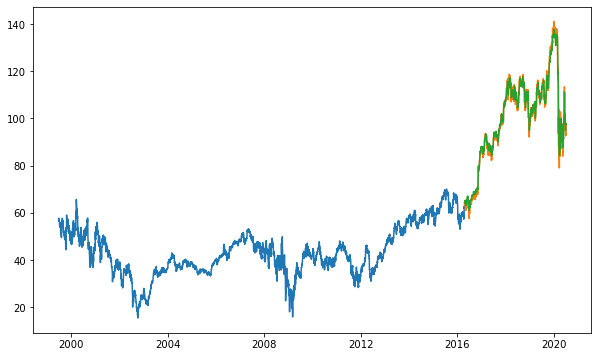

In [183]:
# Plot the model results from the original pandas 'dataframe'
train_data = dataframe[:4228]
test_data = dataframe[4228:]
test_data['Predictions'] = y_pred_lstm
plt.plot(train_data['Close'])
plt.plot(test_data[['Close','Predictions']])

### **5. Results Comparison**

In [487]:
# Compare results from ARIMA time series, KNN and LSTM
ts_result = [rmse, mse, mae]
knn_result = [rmse_knn, mse_knn, mae_knn]
lstm_result = [rmse_lstm, mse_lstm, mae_lstm]
model_results = pd.DataFrame([ts_result,knn_result,lstm_result], index = ['ARIMA Time Series', 'KNN', 'LSTM'], columns = ['RMSE', 'MSE', 'MAE'])
print("Model Results Comparison: ")
model_results.sort_values('MSE')

Model Results Comparison: 


,RMSE,MSE,MAE
ARIMA Time Series,0.473435,0.224140,0.431061
KNN,1.072616,1.150505,0.688455
LSTM,2.149887,4.890289,1.578385


From our 3 finalized best models, the ARIMA time series method still generated the best results with the lowest error scores, followed by KNN. LSTM gave the highest error scores out of the three models, but still is a good model for this project. Therefore, we will choose ARIMA as our final model for the project.

#### **6. Real-Time Stock Price Web Scraping (Bonus)**

This section will provide investors real-time stock prices of JP Morgan Chase to help them stay updated with the latest stock price movement. We will scrape stock prices from Yahoo Finance in real-time using BeautifulSoup.

In [349]:
# Import libraries
import bs4
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime

In [390]:
# Get stock prices from Yahoo Finance for each company using stock codes
def real_time_price(stock_code):
    r = requests.get(('https://finance.yahoo.com/quote/') + stock_code + ('?p=') + stock_code + ('&.tsrc=fin-srch'))    # get data from URL
    content = BeautifulSoup(r.text,"lxml")  # get the web content
    content = content.find('div',{'class':'My(6px) Pos(r) smartphone_Mt(6px)'})    # locate the stock price on the website
    content = content.find('span').text   # convert it to text
    if content==[]:
        content = '99999'      # return NaN if data is missing
    return content

HSI = ['AMZN','JPM','COKE','^GSPC','MSFT','TM','WM']         # list of companies

for step in range(1,101):
    price = []
    col = []
    time_stamp = datetime.datetime.now()                     # get time at the moment
    time_stamp = time_stamp.strftime("%Y-%m-%d %H:%M:%S")    # convert it to the time format desired
    for stock_code in HSI:
        price.append(real_time_price(stock_code))            # update stock price based on stock code for each company on the list
    col = [time_stamp]                                       # create a column for time stanmp
    col.extend(price)                                        # add the prices to the time column
    df = pd.DataFrame(col)                                   # convert it to a data frame
    df = df.T                                                # transpose the df for better readability
    df.to_csv('real_time_stock_price.csv', mode='a', header=False)   # save real-time prices to a csv file on local drive
    print(col)

['2020-08-03 01:37:47', '3,164.68', '96.64', '229.56', '3,271.12', '205.01', '119.34', '109.60']
['2020-08-03 01:37:53', '3,164.68', '96.64', '229.56', '3,271.12', '205.01', '119.34', '109.60']
['2020-08-03 01:37:58', '3,164.68', '96.64', '229.56', '3,271.12', '205.01', '119.34', '109.60']
['2020-08-03 01:38:04', '3,164.68', '96.64', '229.56', '3,271.12', '205.01', '119.34', '109.60']
['2020-08-03 01:38:09', '3,164.68', '96.64', '229.56', '3,271.12', '205.01', '119.34', '109.60']
['2020-08-03 01:38:15', '3,164.68', '96.64', '229.56', '3,271.12', '205.01', '119.34', '109.60']
['2020-08-03 01:38:30', '3,164.68', '96.64', '229.56', '3,271.12', '205.01', '119.34', '109.60']
['2020-08-03 01:38:36', '3,164.68', '96.64', '229.56', '3,271.12', '205.01', '119.34', '109.60']
['2020-08-03 01:38:42', '3,164.68', '96.64', '229.56', '3,271.12', '205.01', '119.34', '109.60']
['2020-08-03 01:38:48', '3,164.68', '96.64', '229.56', '3,271.12', '205.01', '119.34', '109.60']


KeyboardInterrupt: 

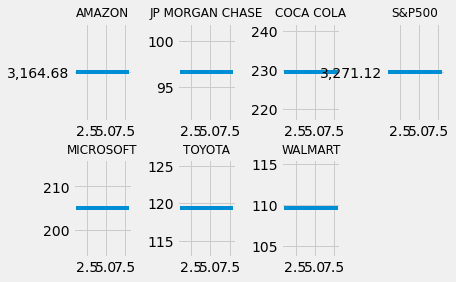

In [398]:
# Visualize real-time stock prices
import matplotlib.animation as animation
from matplotlib import style

# Create plots for 7 companies
style.use('fivethirtyeight')
fig = plt.figure()
ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,2)
ax3 = fig.add_subplot(2,4,3)
ax4 = fig.add_subplot(2,4,4)
ax5 = fig.add_subplot(2,4,5)
ax6 = fig.add_subplot(2,4,6)
ax7 = fig.add_subplot(2,4,7)

# Add details and values of each company's stock prices to the plot
def animate(i):
    df = pd.read_csv('real_time_stock_price.csv')
    ys = df.iloc[1:,2].values
    xs = list(range(1, len(ys)+1))
    ax1.clear()
    ax1.plot(xs,ys)
    ax1.set_title('AMAZON', fontsize=12)
    
    ys = df.iloc[1:,3].values
    ax2.clear()
    ax2.plot(xs,ys)
    ax2.set_title('JP MORGAN CHASE', fontsize=12)
    
    ys = df.iloc[1:,4].values
    ax3.clear()
    ax3.plot(xs,ys)
    ax3.set_title('COCA COLA', fontsize=12)
    
    ys = df.iloc[1:,5].values
    ax4.clear()
    ax4.plot(xs,ys)
    ax4.set_title('S&P500', fontsize=12)
    
    ys = df.iloc[1:,6].values
    ax5.clear()
    ax5.plot(xs,ys)
    ax5.set_title('MICROSOFT', fontsize=12)
    
    ys = df.iloc[1:,7].values
    ax6.clear()
    ax6.plot(xs,ys)
    ax6.set_title('TOYOTA', fontsize=12)
    
    ys = df.iloc[1:,8].values
    ax7.clear()
    ax7.plot(xs,ys)
    ax7.set_title('WALMART', fontsize=12)

# Show all plots 
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.tight_layout()
plt.show()

Here we have scraped real-time stock prices for all 6 companies and the index price. Since the stock prices are scraped when stock markets are closed at the time of this section, prices don't change and remain constant as shown in the above graphs.

#### **7. Model Visualization, Automation and Deployment**

The time series model will be created for visualization in Tableau to help investors have a better understanding of stock price movement. Here's the link to the dashboard: https://tabsoft.co/2DxdiBV

For the purpose of practicing Azure ML, the chosen ARIMA time series model will be applied in Azure ML using R scripts to automate the modeling process and deploy the model. Here's the link to the experiment: https://bit.ly/3ksg24c

#### **8. Conclusion**

**Best Model**: 
This project used a combination of Time Series Analysis, Maching Learning Regression and Deep Learning models. ARIMA Time Series Analysis turned out to provide the best model results for stock price prediction of Chase company due to its main function based on a time series. We achieved the model prediction accuracy using ARIMA with error scores close to 1%, lower than all the other models applied in this project.

**Comments on Other Models**:
While ARIMA Time Series performs well on a time series with constant intervals, ML Regression and DL models, though providing less accuracy than ARIMA, still work quite well in the stock price prediction problem. In fact, their error scores are relatively low, ranging from 0.68 to 4.89. 

ML Regression algorithms may work better for datasets that have multiple predictors to predict a continuous variable, avoiding underfit by reducing bias (how well the model fits the data) and increasing variance (how the dependent variable changes in response to independent variables' changes). In this project, we only used Date as the predictor for Close price as the other columns (High, Low, Open, Volume) are highly correlated to each other and don't provide much necessary information to the model. This reduces the ability for regression models to perform well compared to ARIMA.

The DL model performs the worst compared to ML Regression and ARIMA models as neural networks tend to work well on large and complex data. It is hard to train due to numerous parameter tuning and may take a long time to train. The parameter settings can't be calculated from the data. ARIMA is more restricted and works better on a small dataset like this problem and requires a set a parameters (p, d, q) that can be calculated from the data, making the model perform better than DL in this project.

**Limitation**:
Time series problems by nature are hard to predict as there are various hidden influencers such as political news, laws and policies, leadership changes, business acquisitions or mergers, natural disasters, and so on. The models in this project use historical data to predict future stock prices, in some way simplifying the problem by not taking into consideration the unpredictable future events in the market. In reality, these events play a significant role in influencing the stock price movement. Thus, this project can only provide insights for investors based on historical stock prices and help them have a general idea of how the company analyzed is performing. Due to the unpredictable factors mentioned above, the models in the project can't provide perfect accuracy of the stock prices in the future.